# My Details:
* Name: Nadav Shlomo Shaoulian
* ID: 311235584
* Kaggle User Profile: https://www.kaggle.com/NadavShaoulian

#About the competition
###Real estate investment
is one best type of investment becouse the statble,The benefits of investing in real estate are numerous With well-chosen assets, investors can enjoy predictable cash flow, excellent returns, tax advantages, and diversification—and it's possible to leverage real estate to build wealth. Real estate investors make money through rental income, any profits generated by property-dependent business activity, and appreciation. Real estate values tend to increase over time, and with a good investment, you can turn a profit when it's time to sell. Rents also tend to rise over time, which can lead to higher cash flow. This chart from the Federal Reserve Bank of St. Louis shows average home prices in the U.S. since 1963. The areas shaded in grey indicate U.S. recessions

# Our goal: 

our main goal is developing an algorithm that best predicts House Prices, allowing the real estate company decide on the best prices to practice in the market, bringing agility and a robust system behind it. 

## Visualization:

In [65]:
# update plotly and pandas_profiling version
!pip install --upgrade plotly
!pip install sweetviz

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.14.1)


In [66]:
# import numpy, matplotlib, etc.
import math
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# sklearn imports
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import neural_network
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

#Data Understanding

In [67]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")
test_id = test_df["Id"]

In [68]:
display(train_df)

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 81 columns]

now we will se all our features each column is a feature , another description is type 

In [69]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC


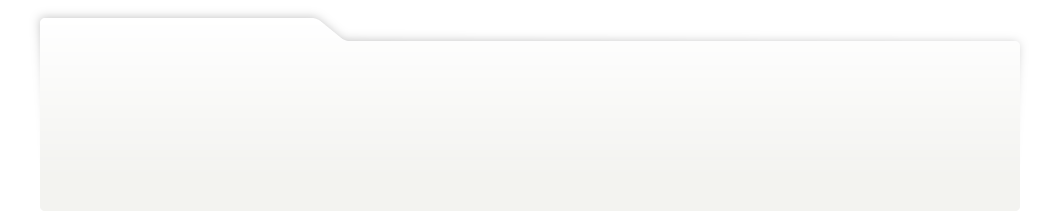
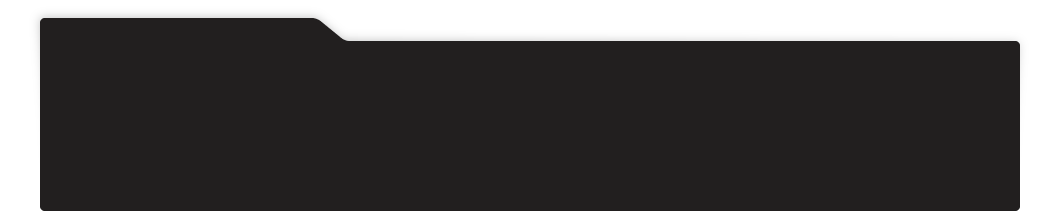
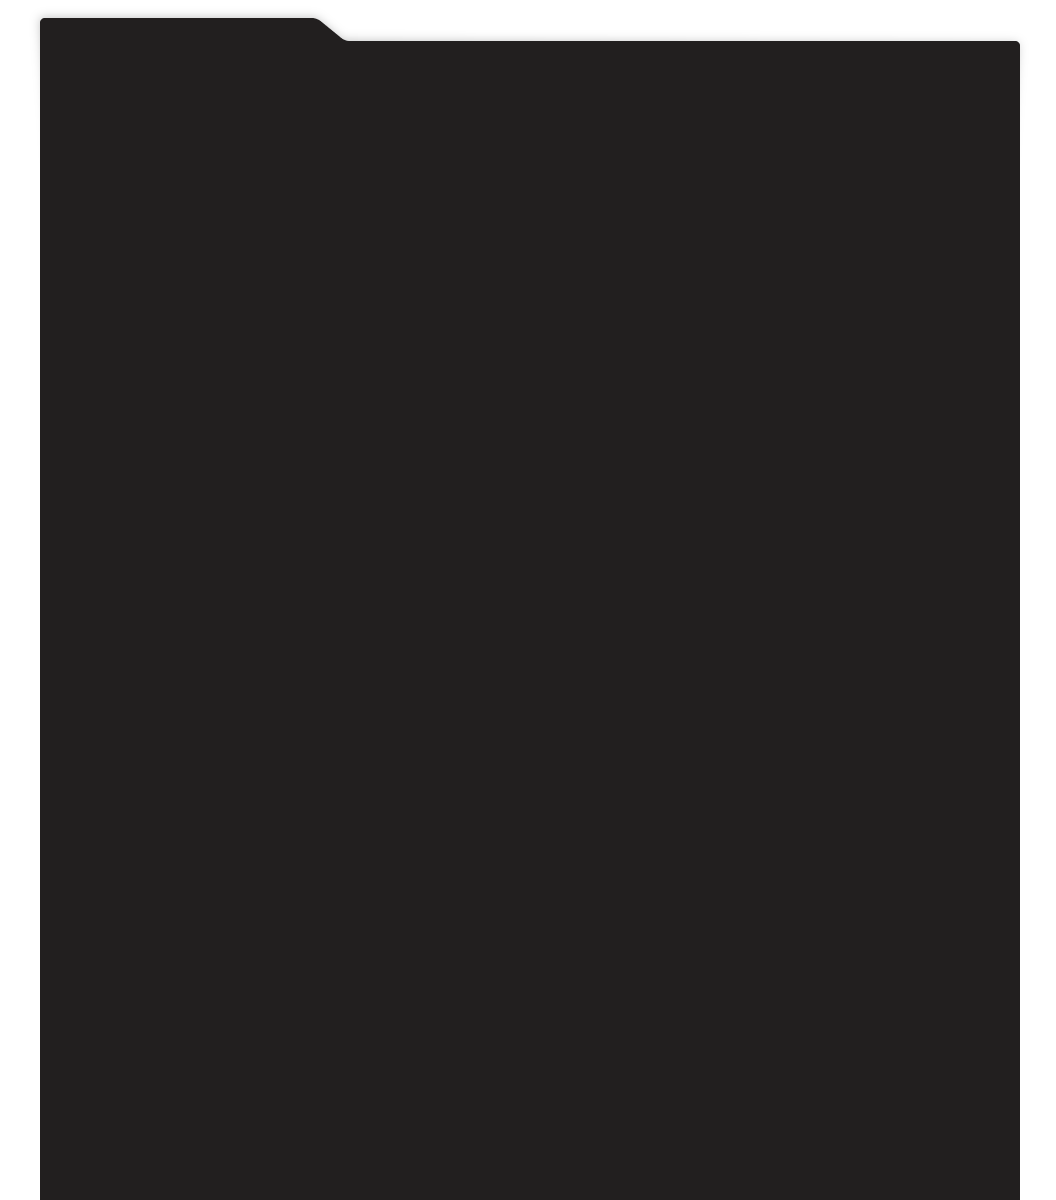
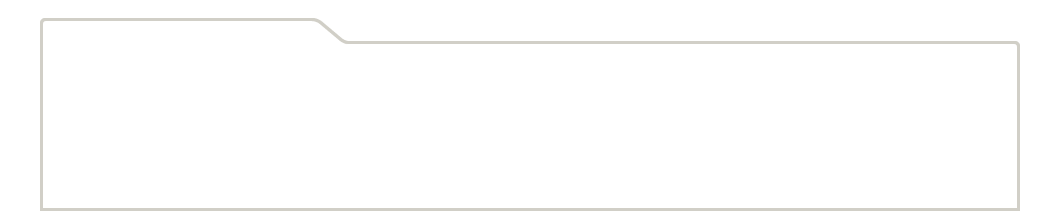
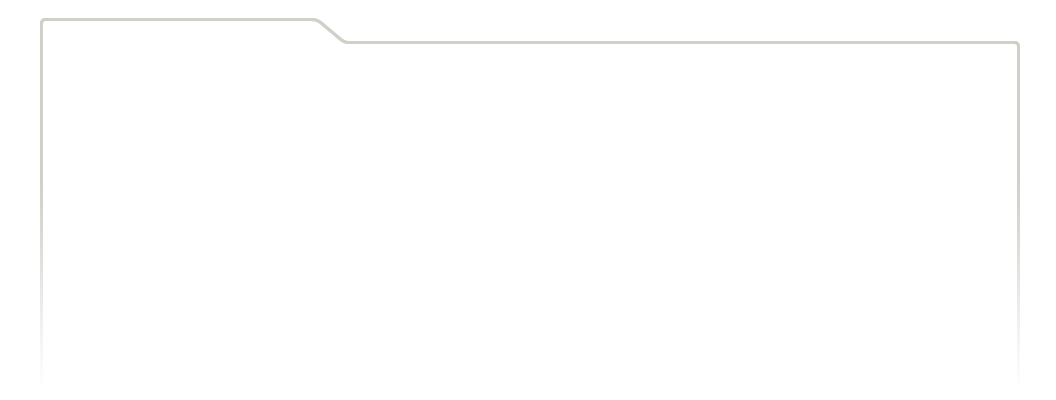
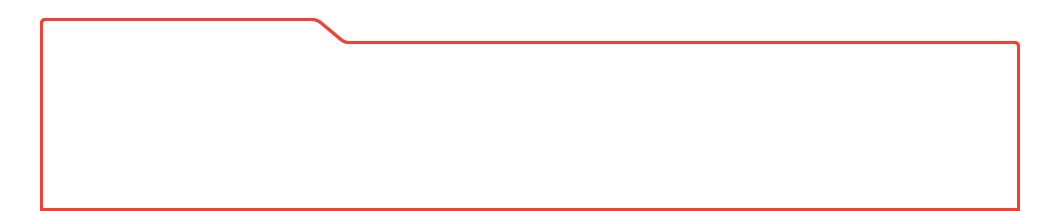
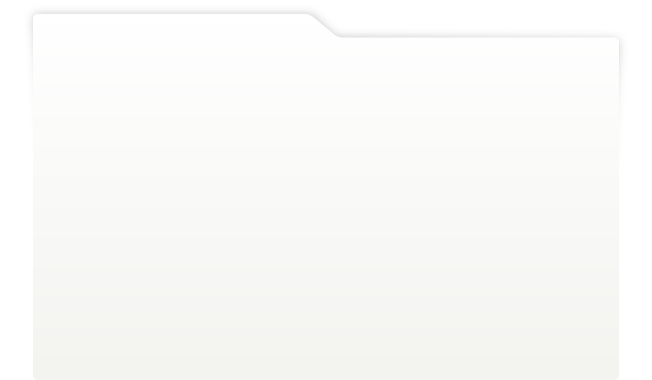
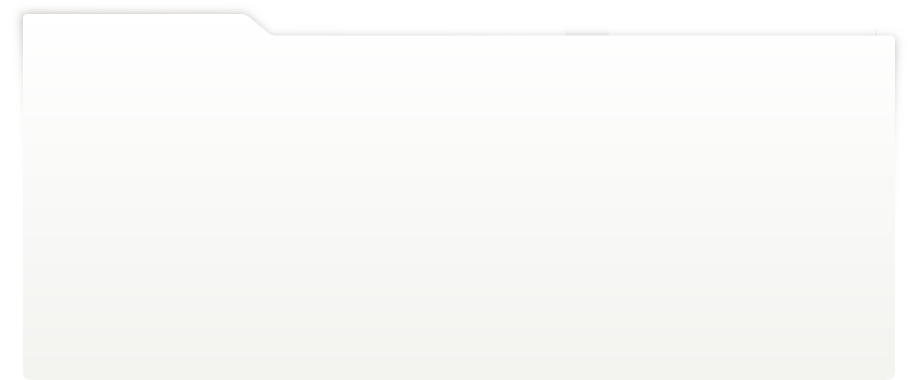
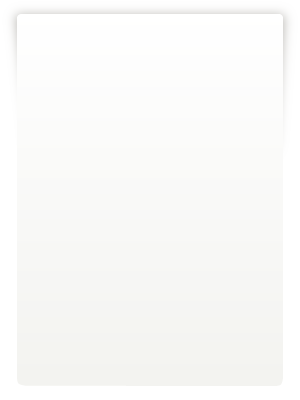
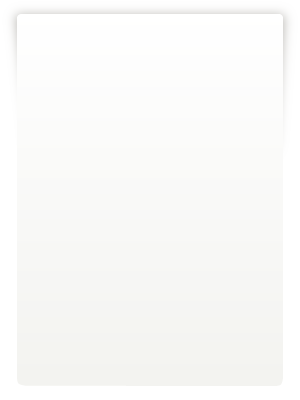
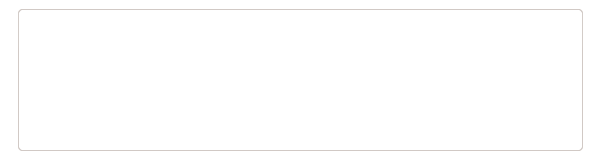
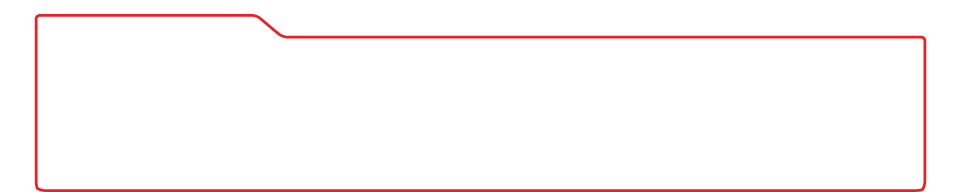
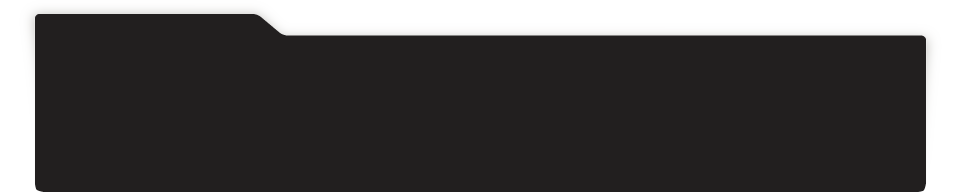
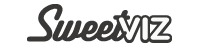
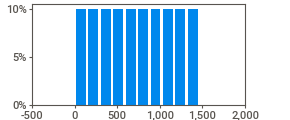
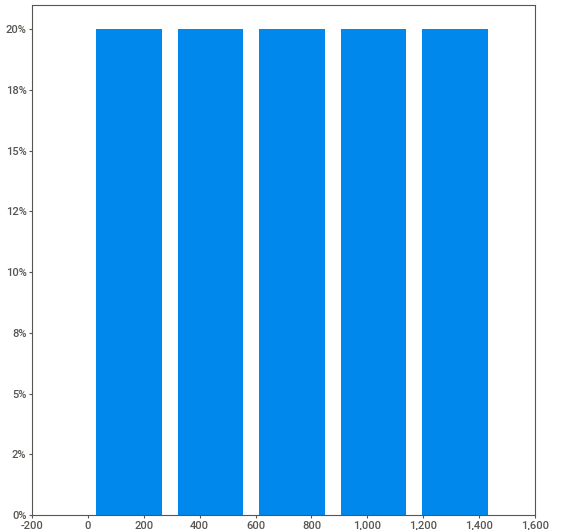
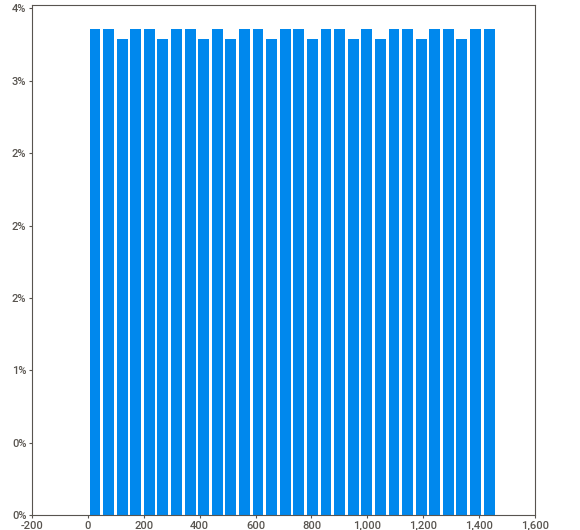
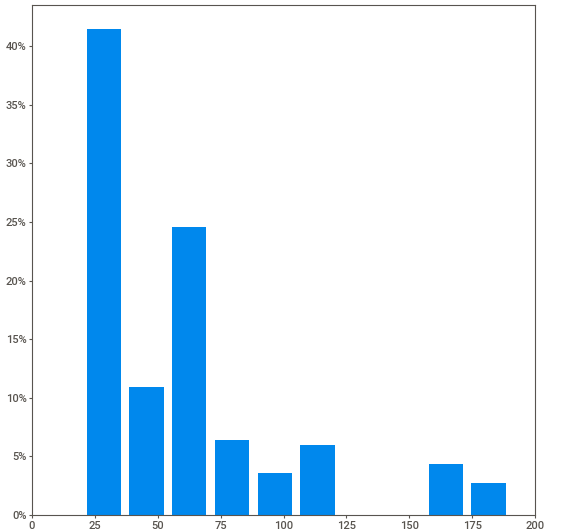
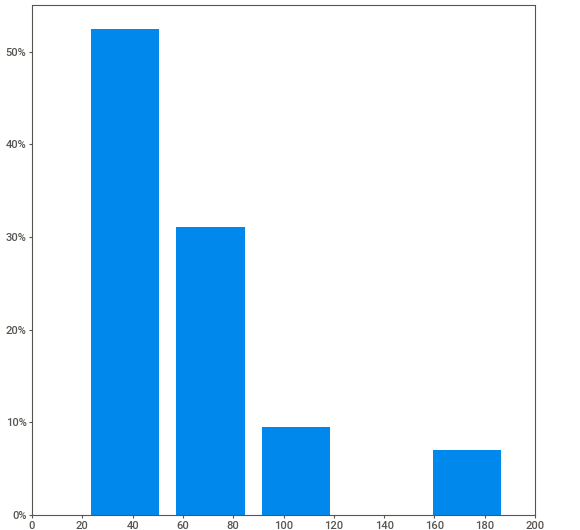
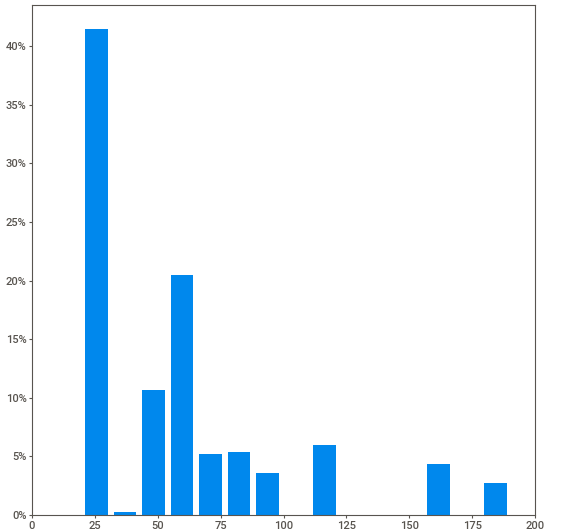
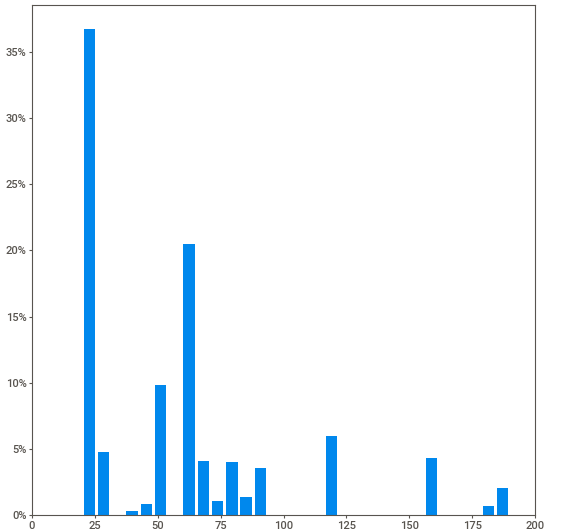
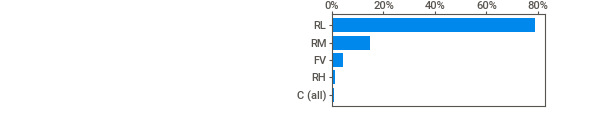
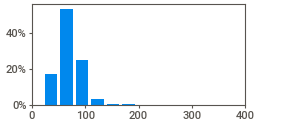
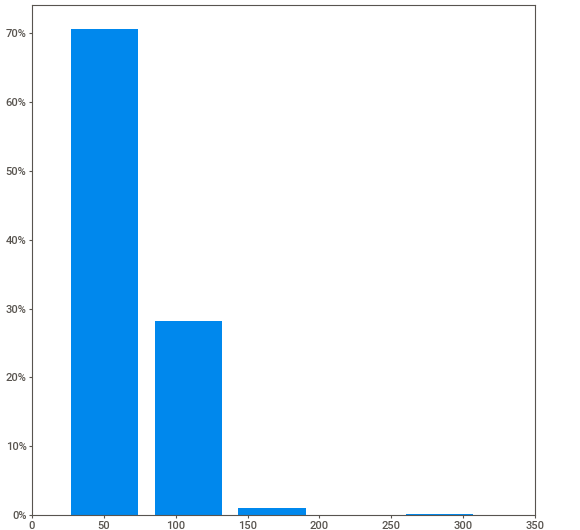
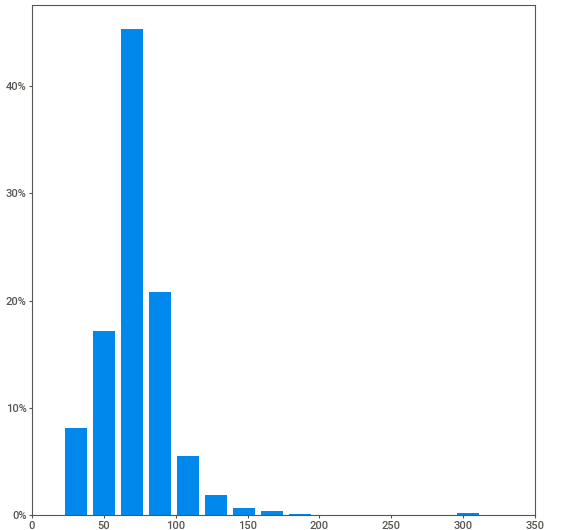
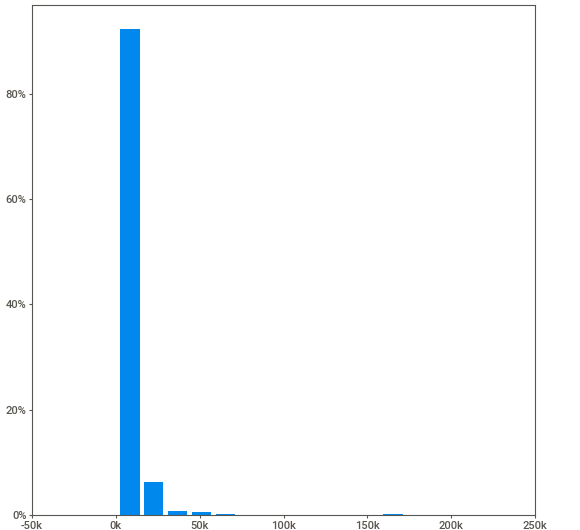
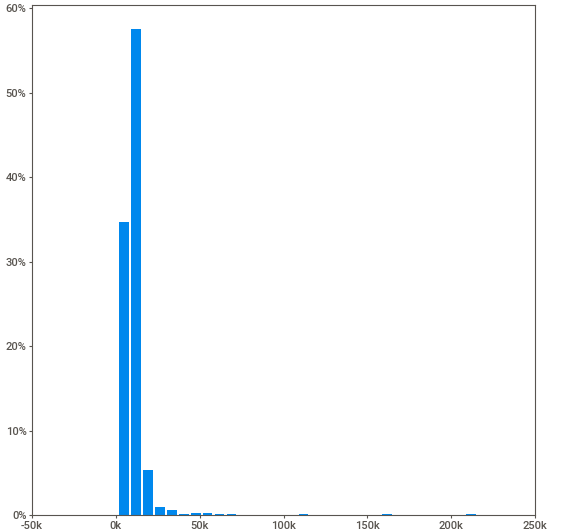
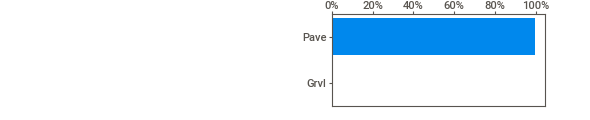
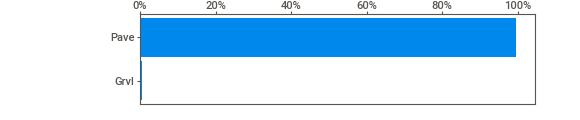
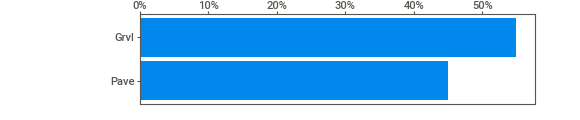
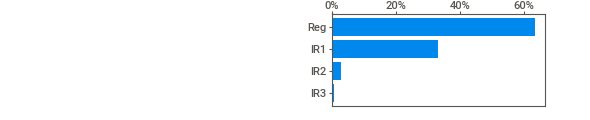
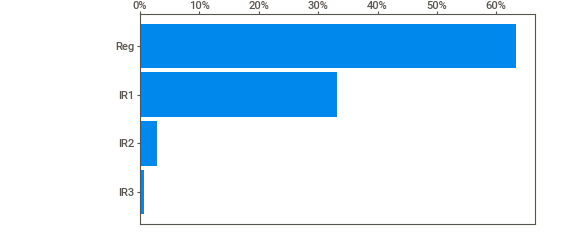
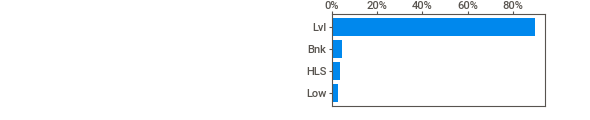
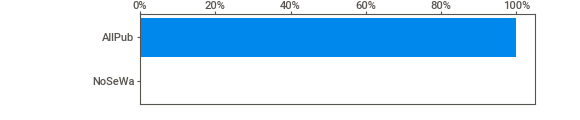
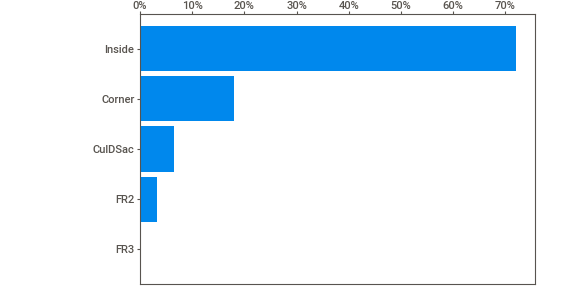
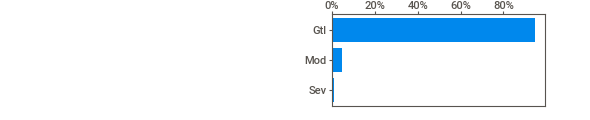
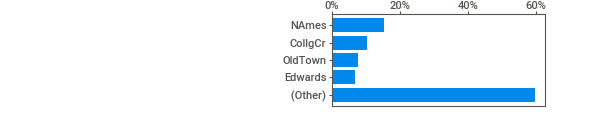
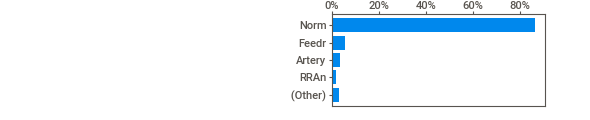
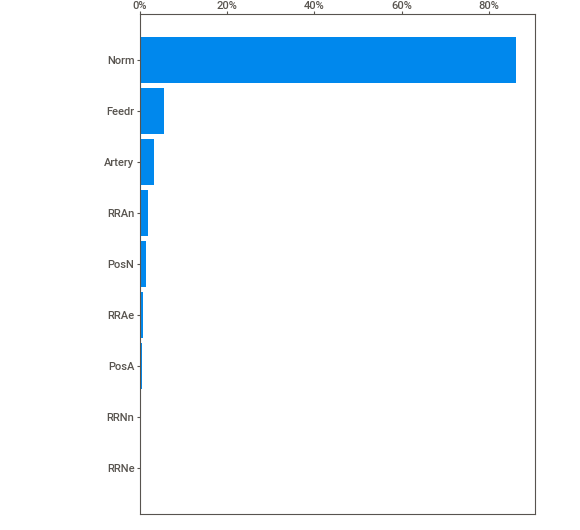
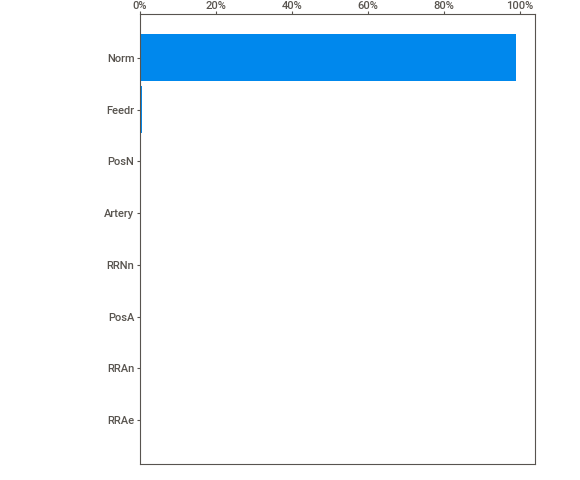
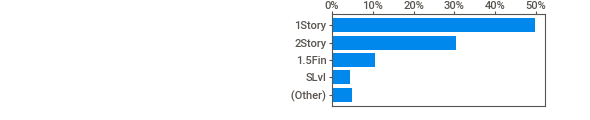
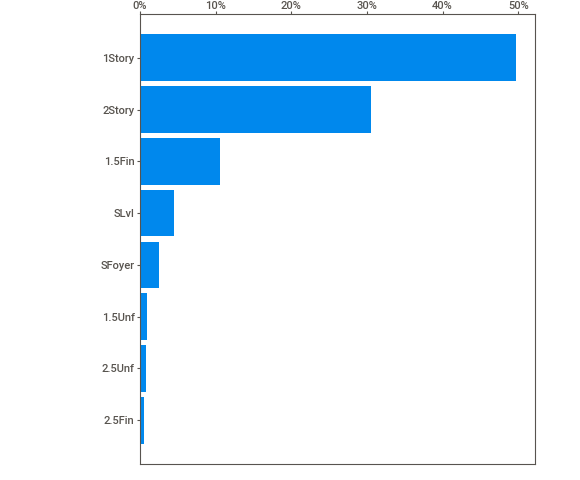
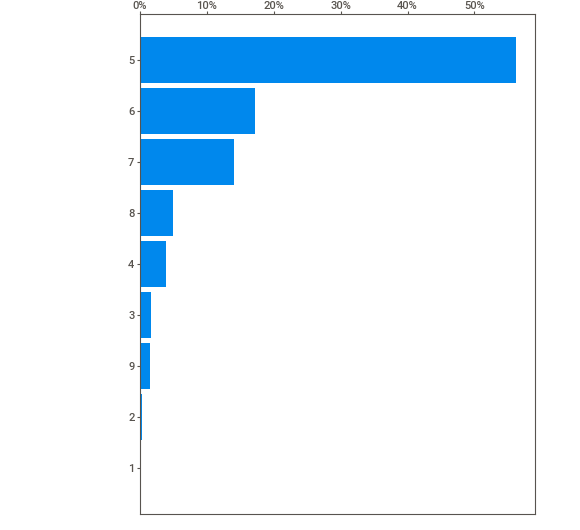
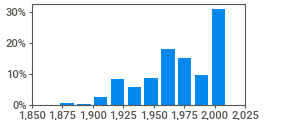
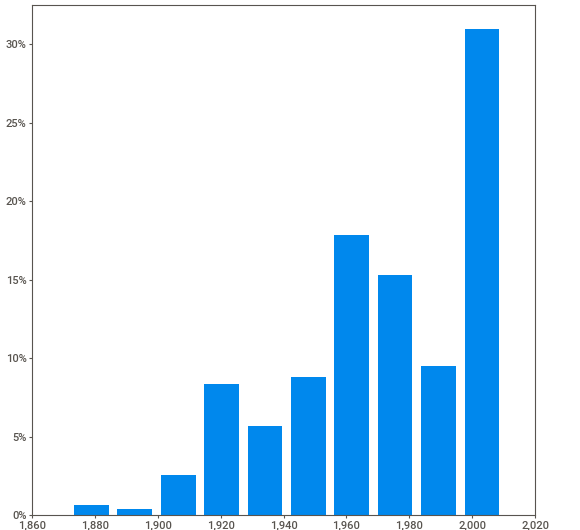
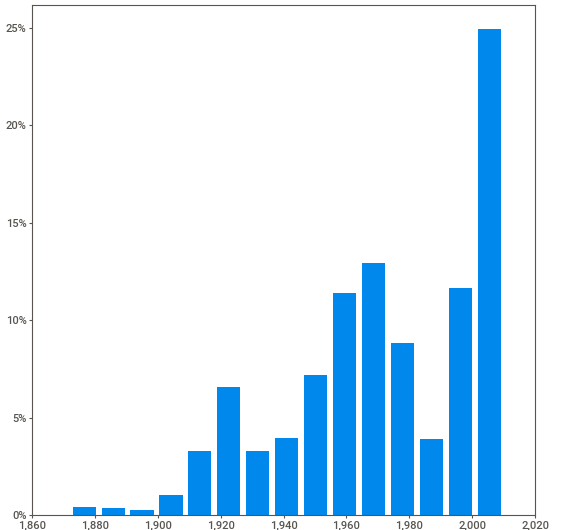
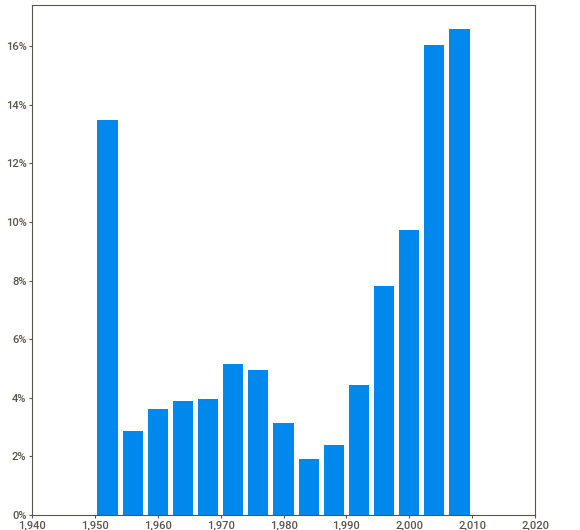
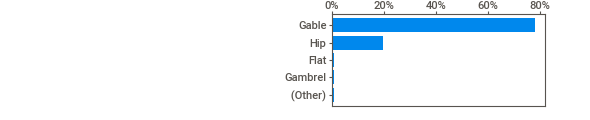
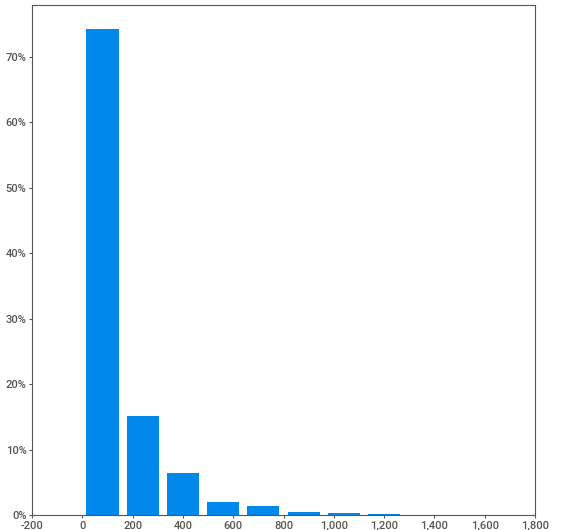
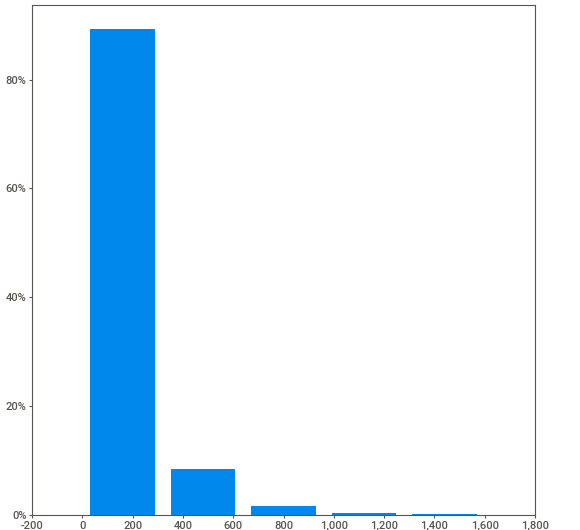
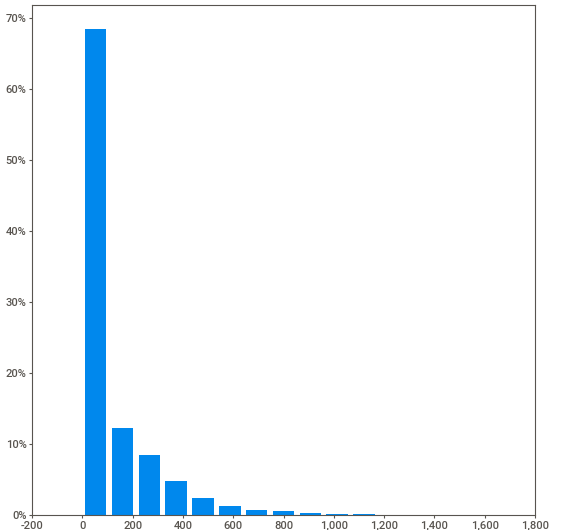
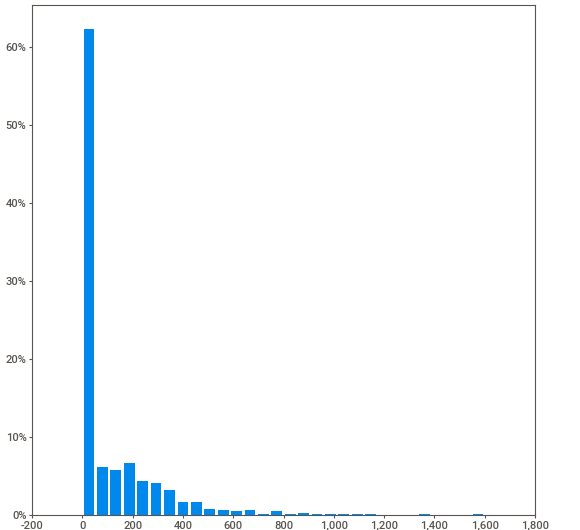
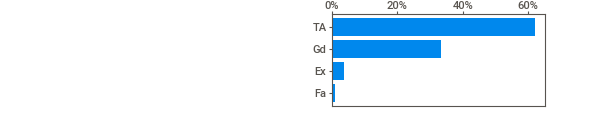
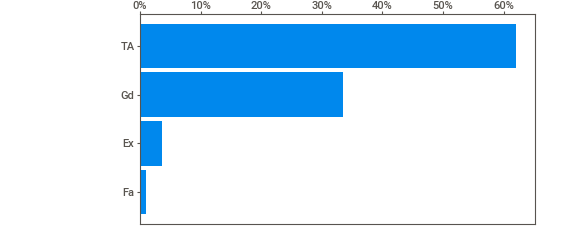
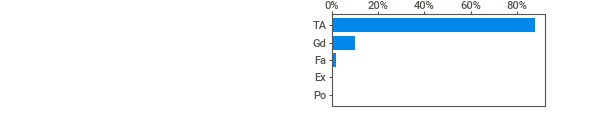
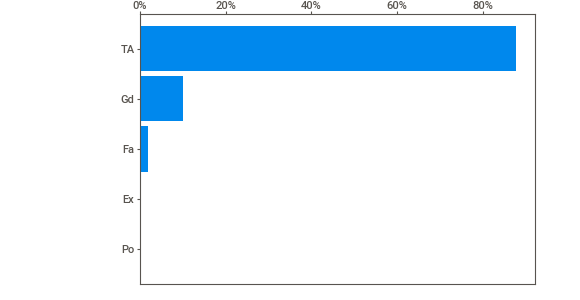
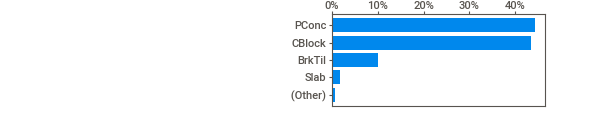
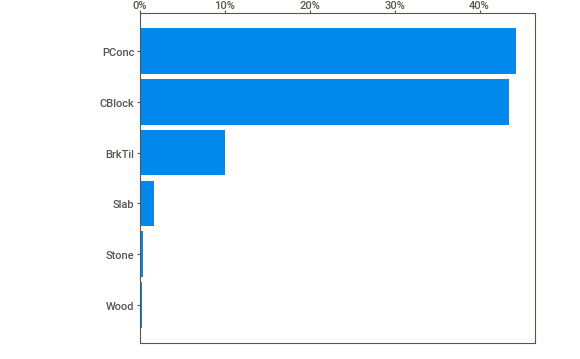
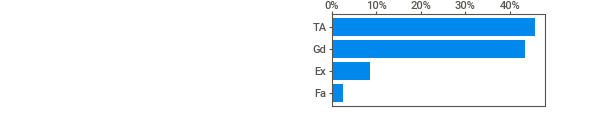
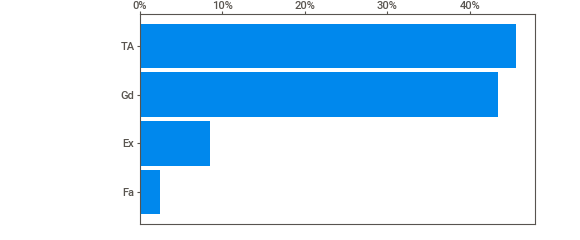
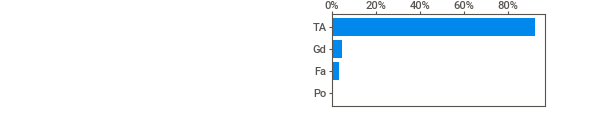
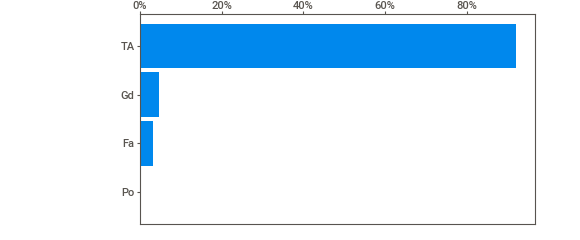
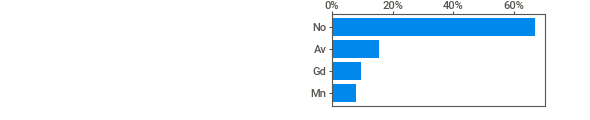
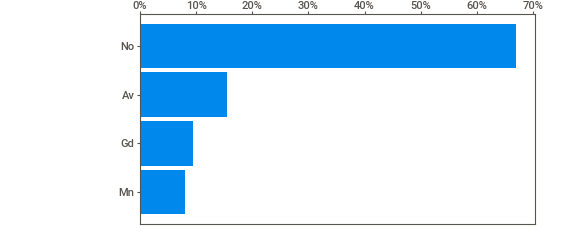
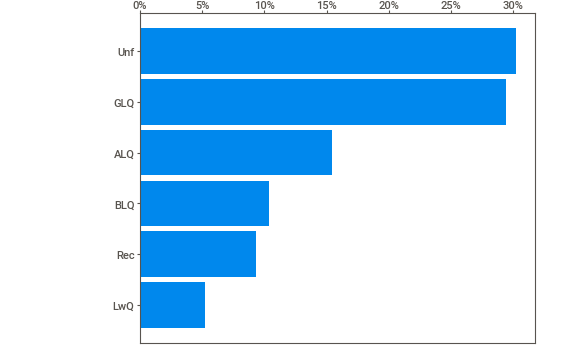
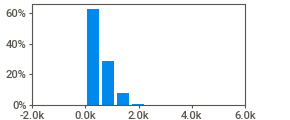
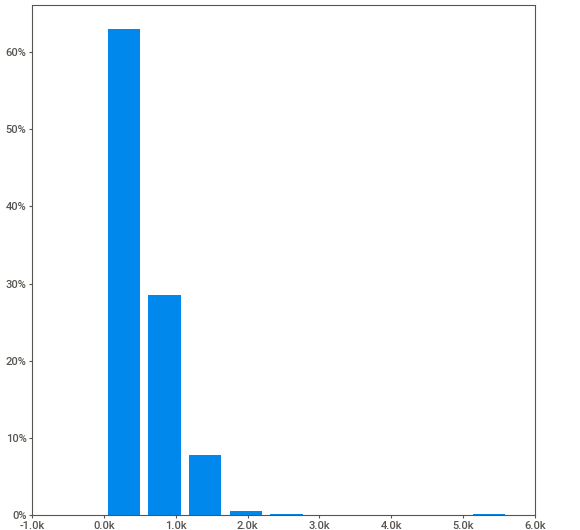
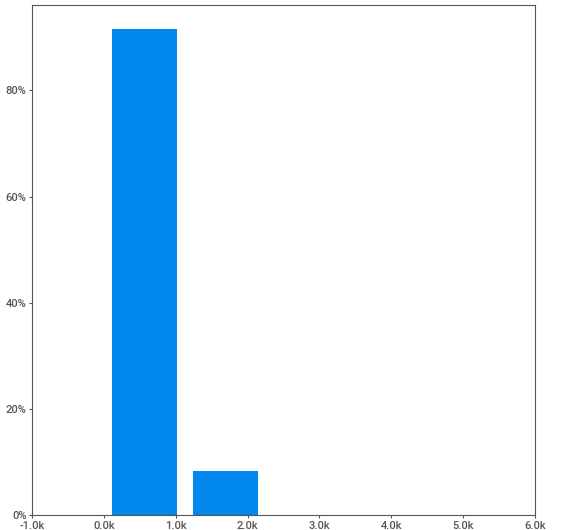
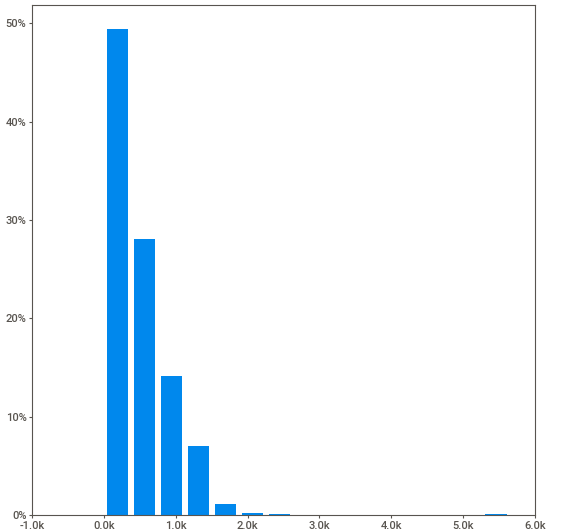
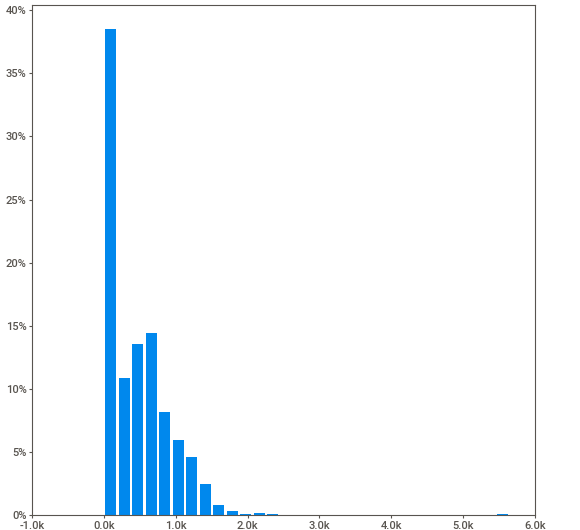
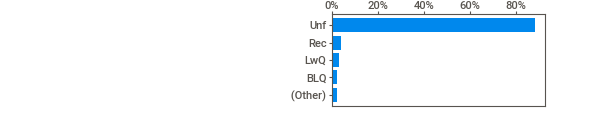
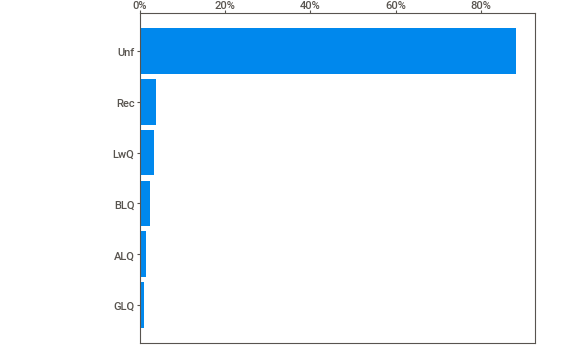
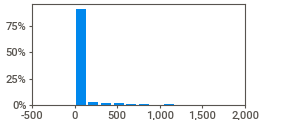
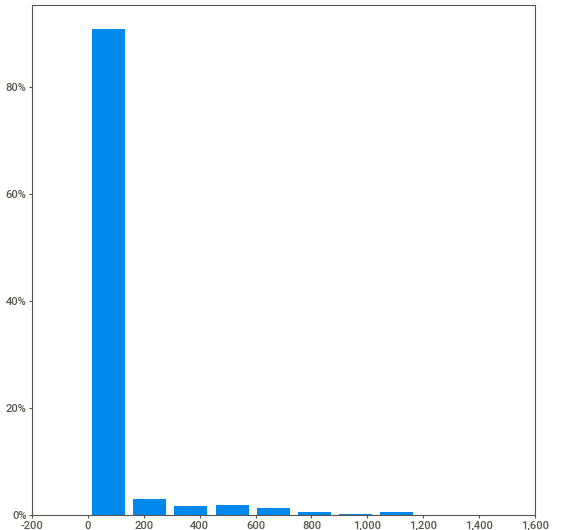
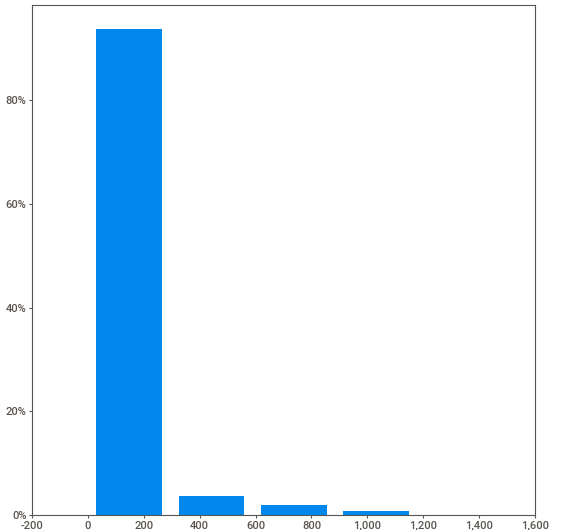
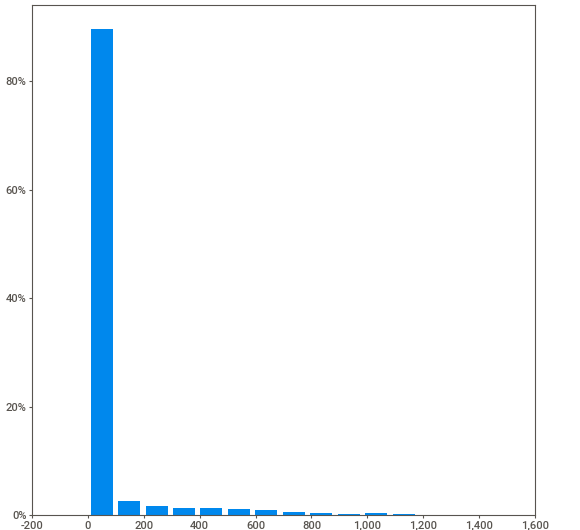
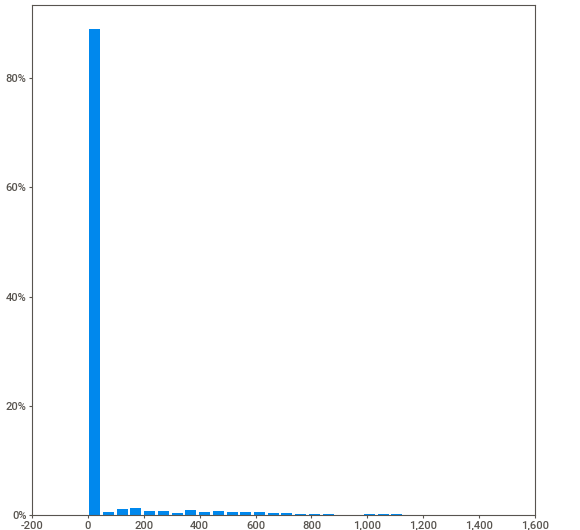
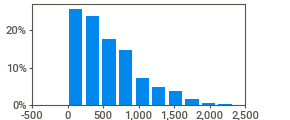
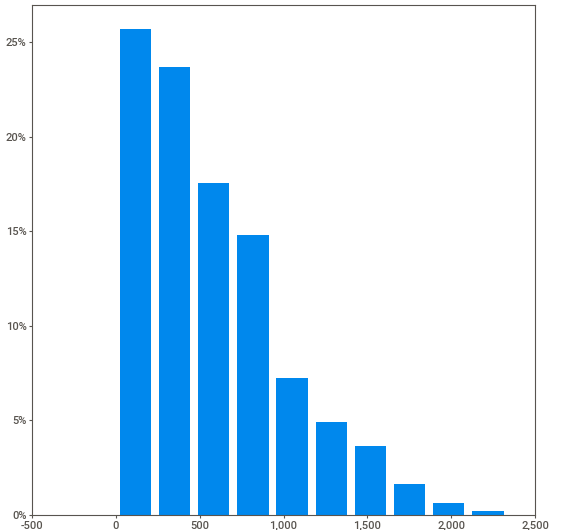
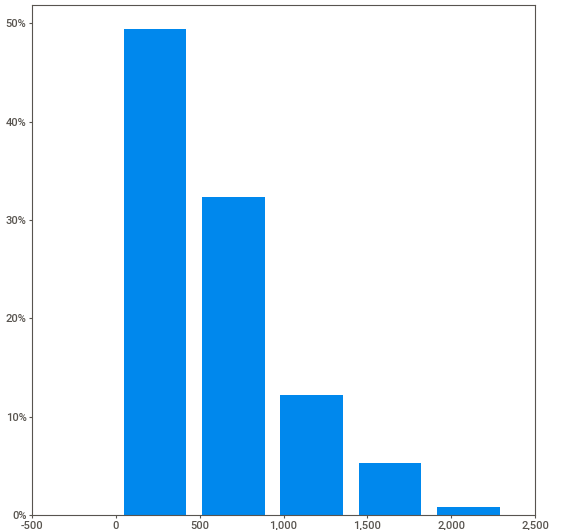
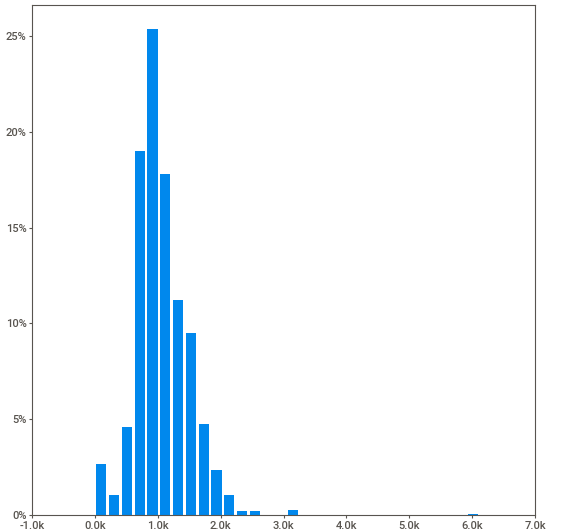
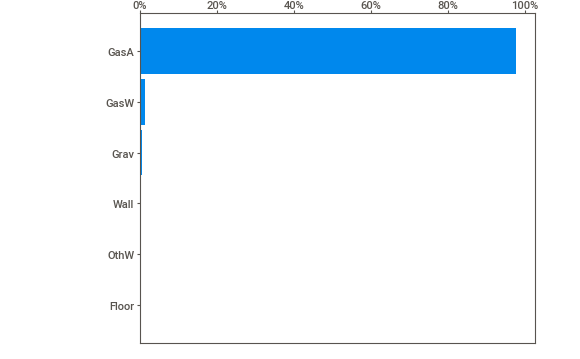
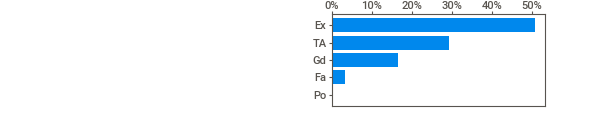
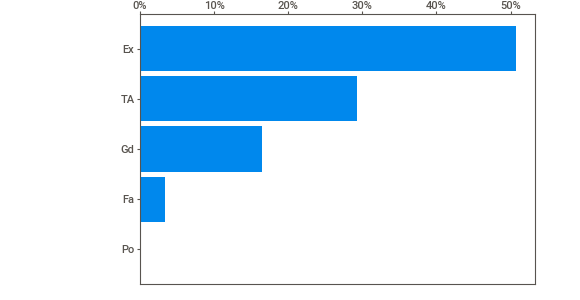
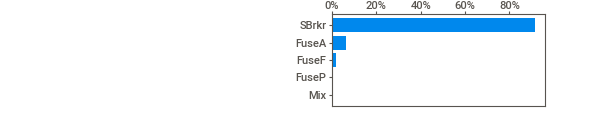
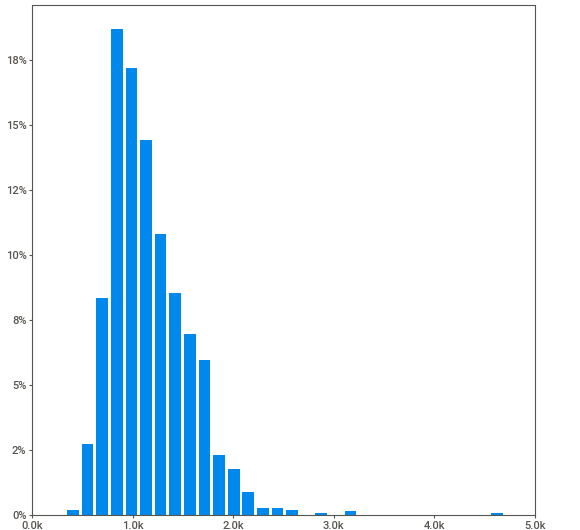
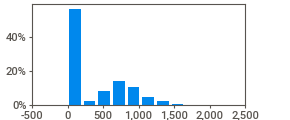
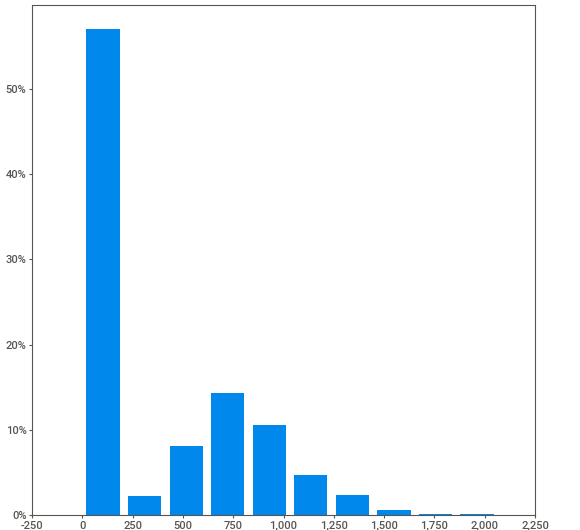
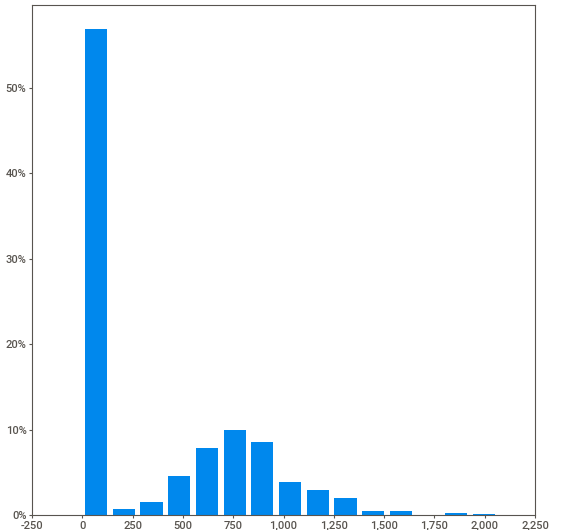
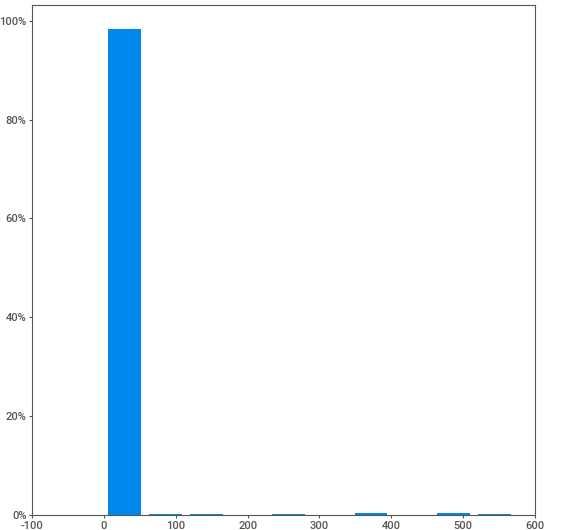
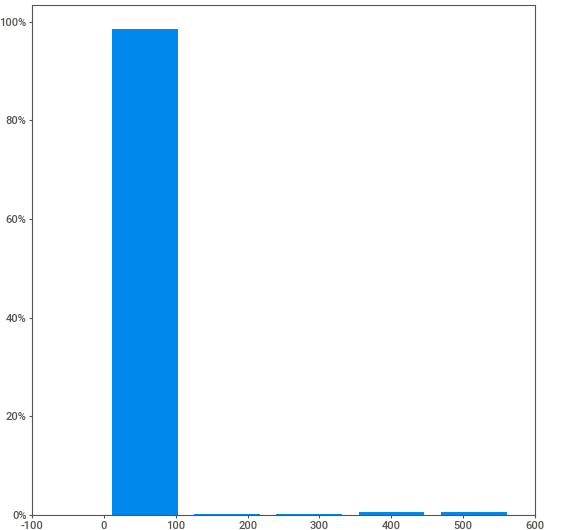
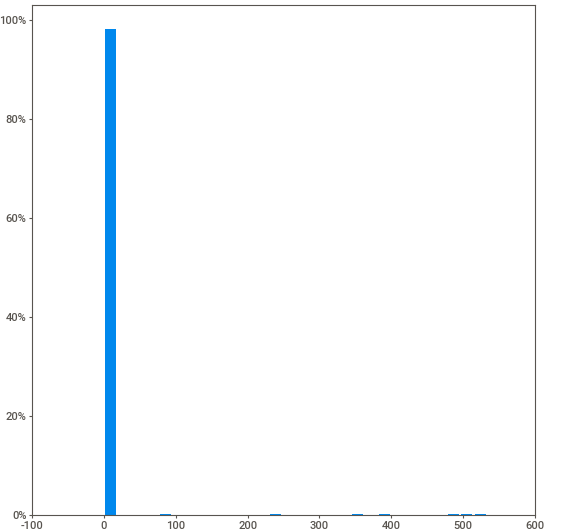
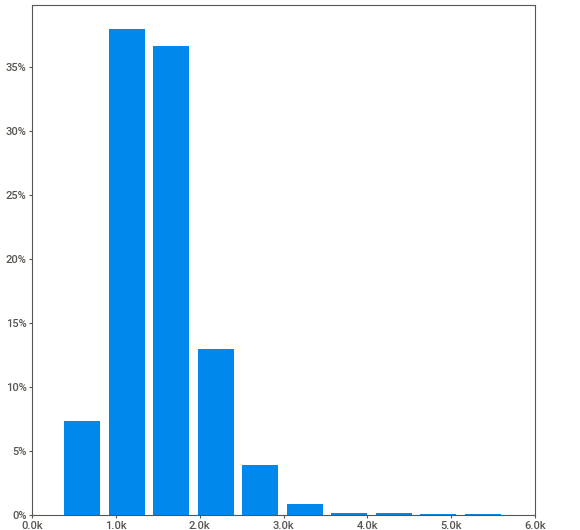
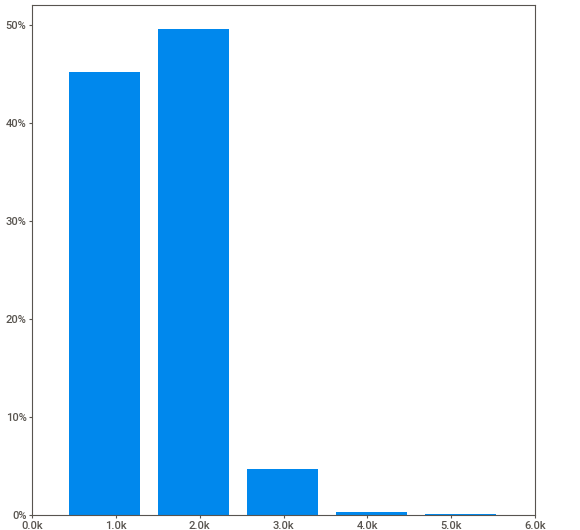
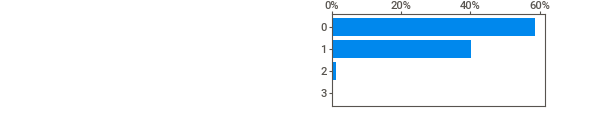
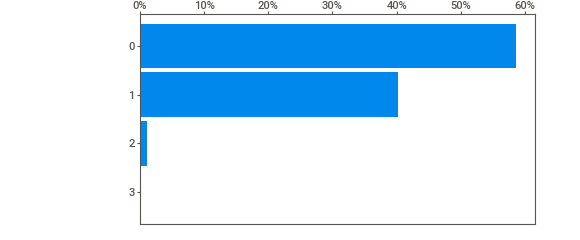
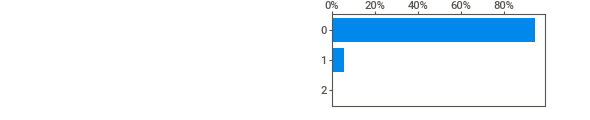
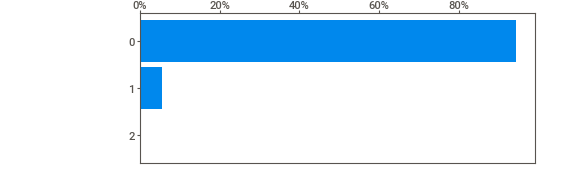
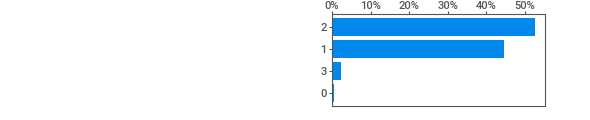
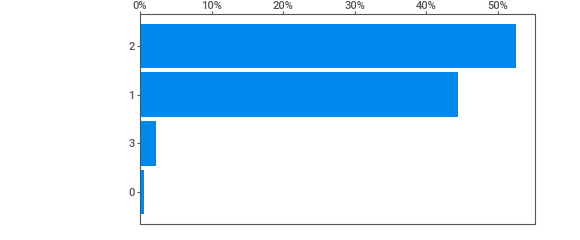
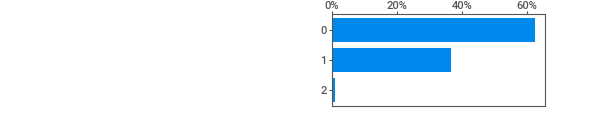
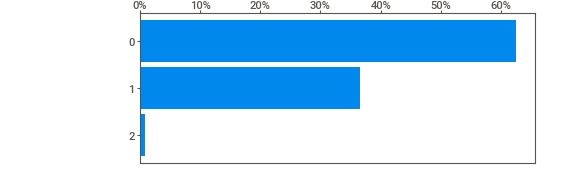
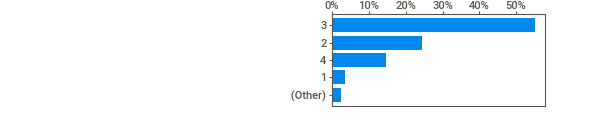
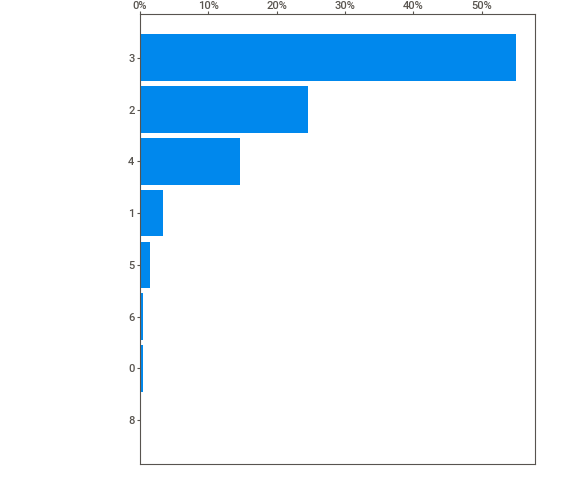
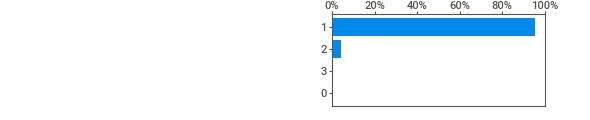
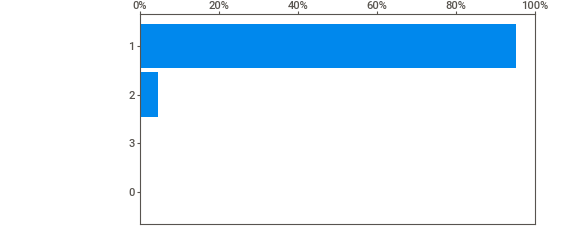
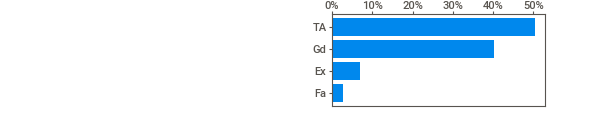
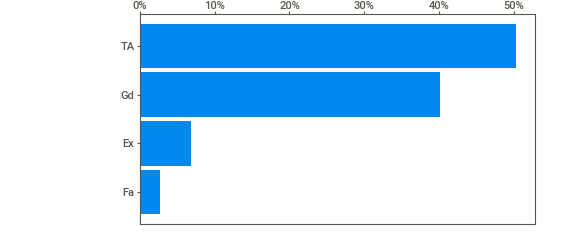
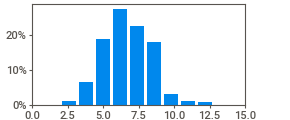
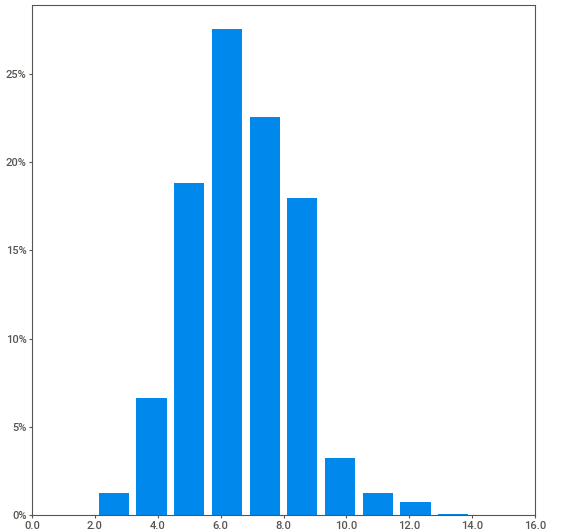
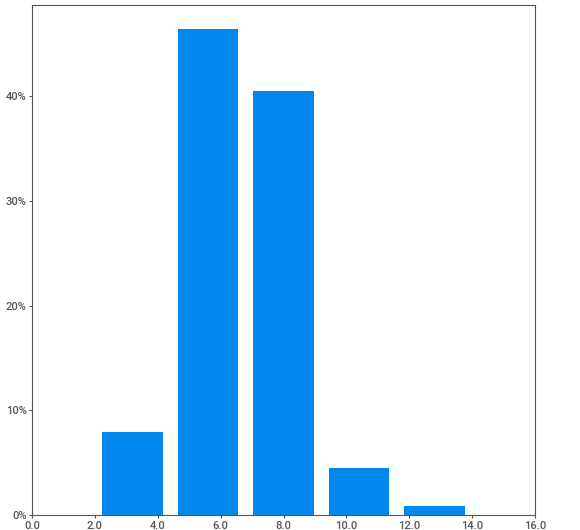
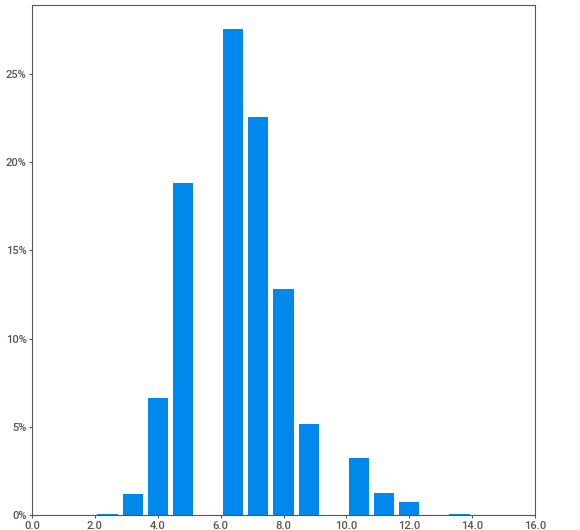
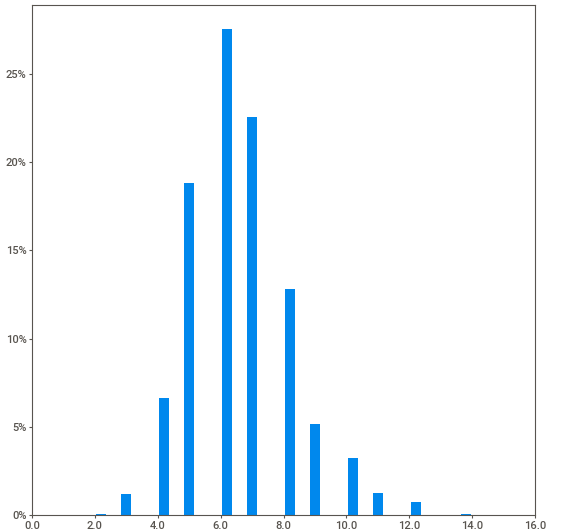
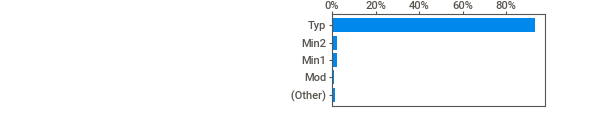
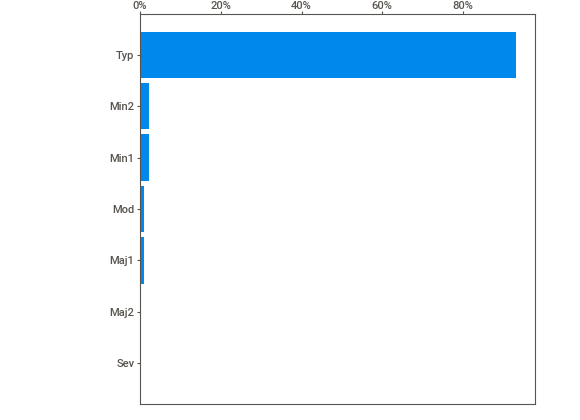
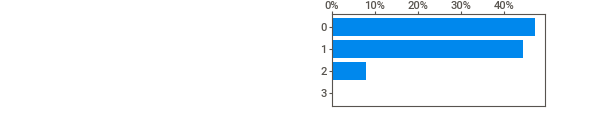
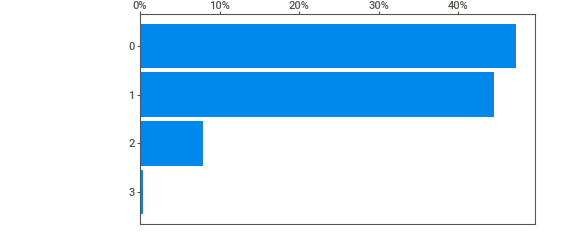
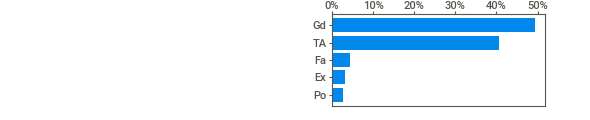
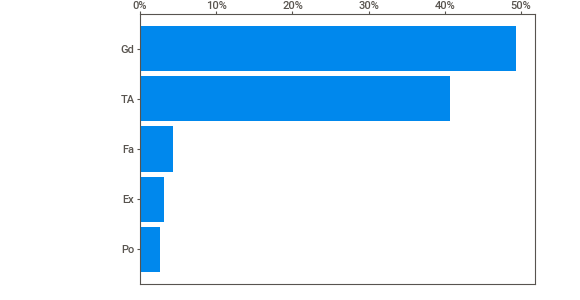
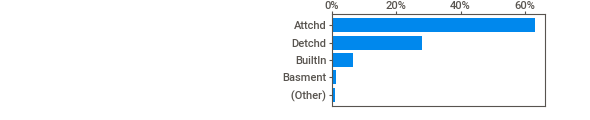
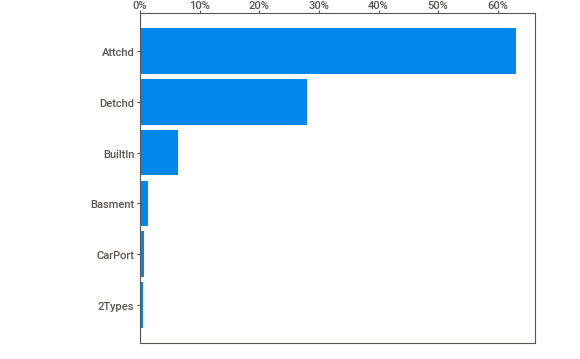
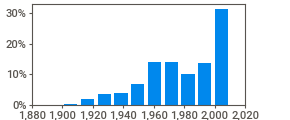
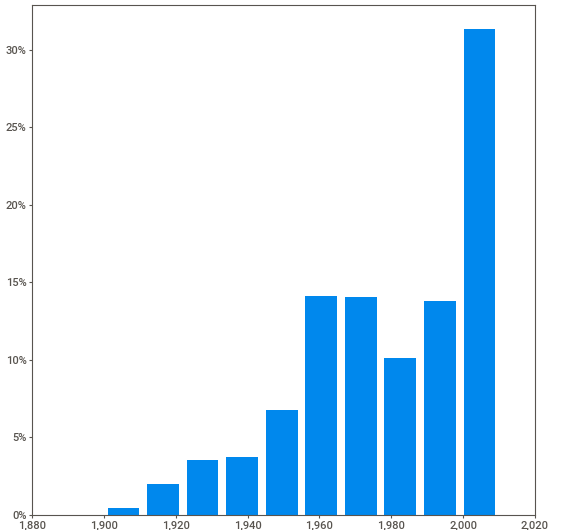
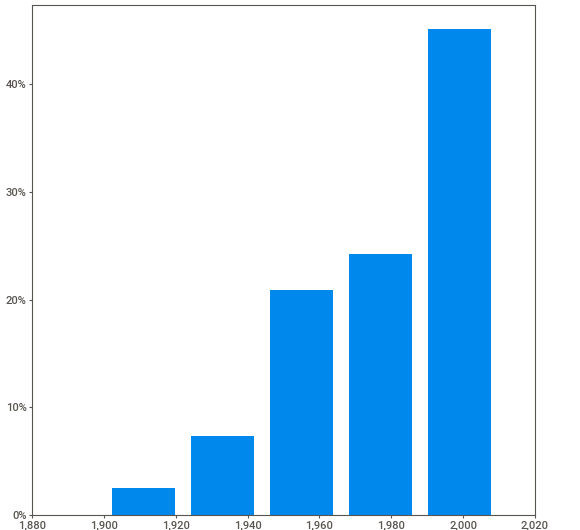
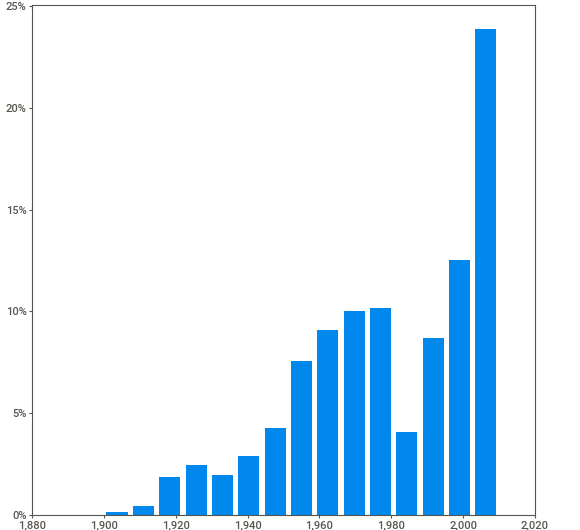
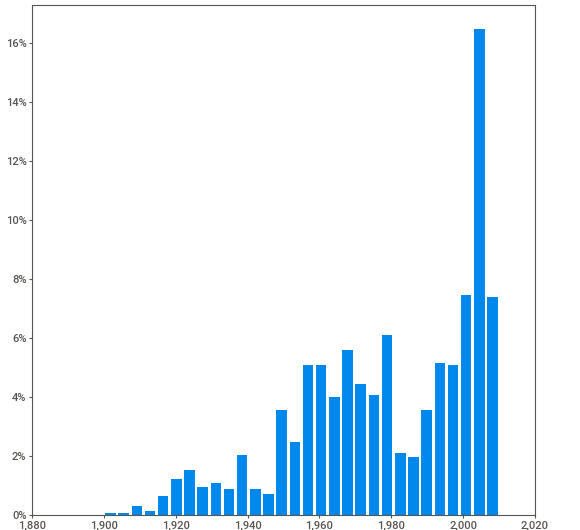
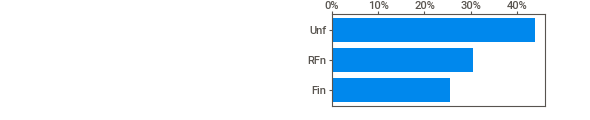
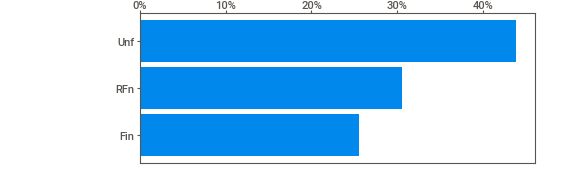
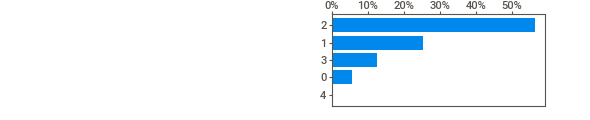
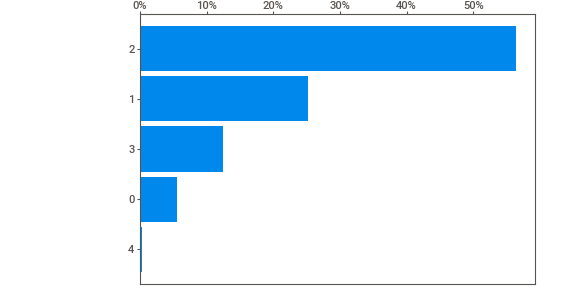
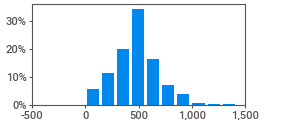
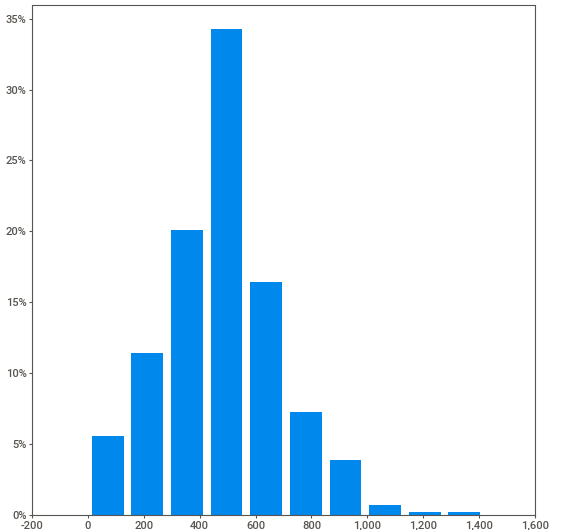
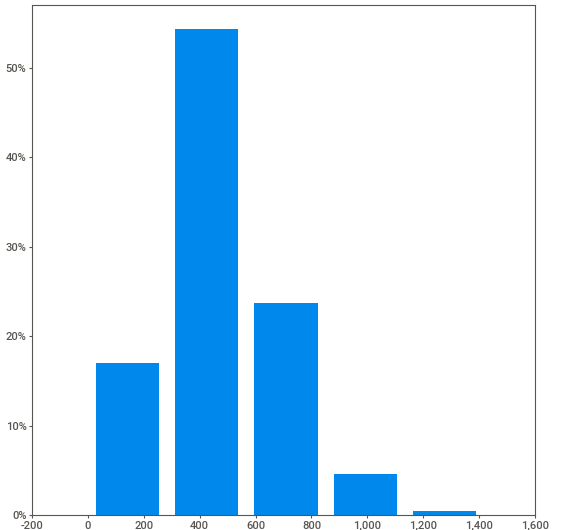
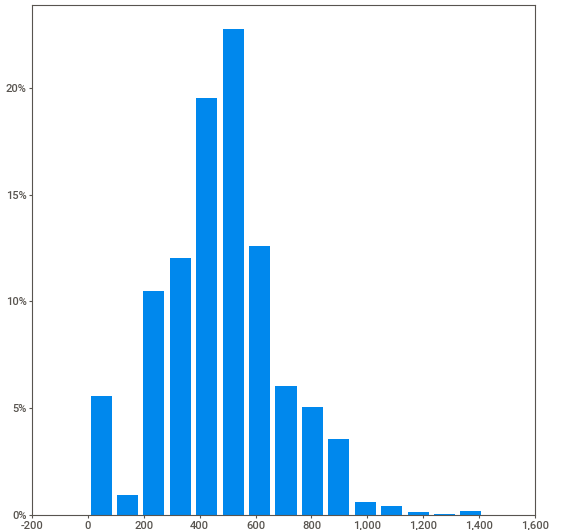
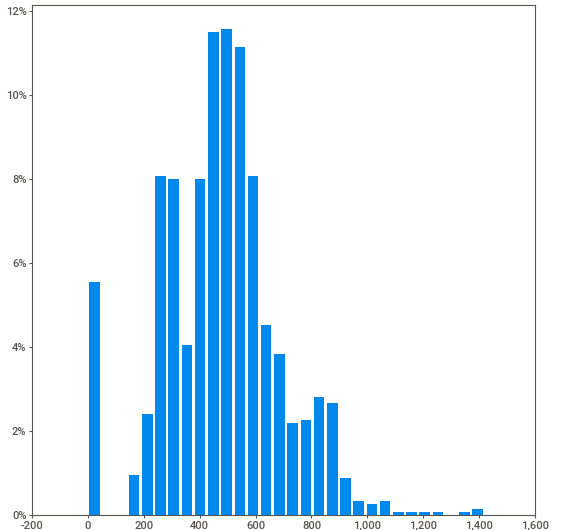
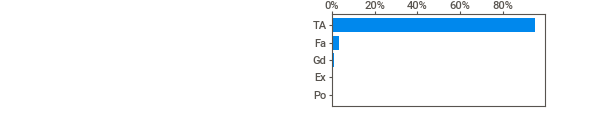
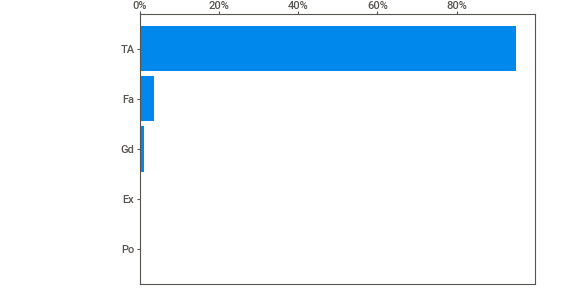
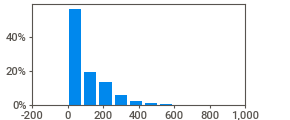
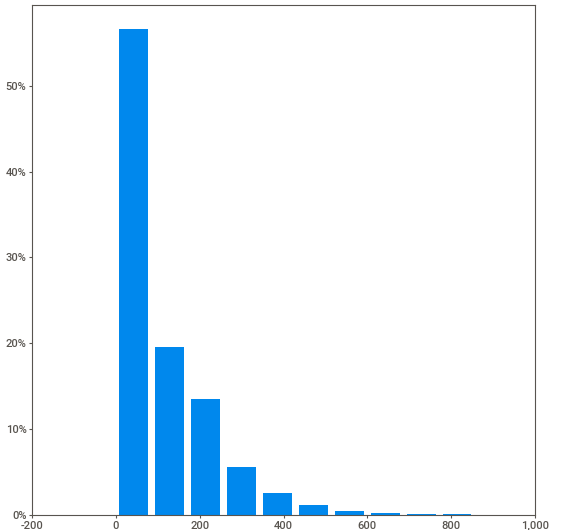
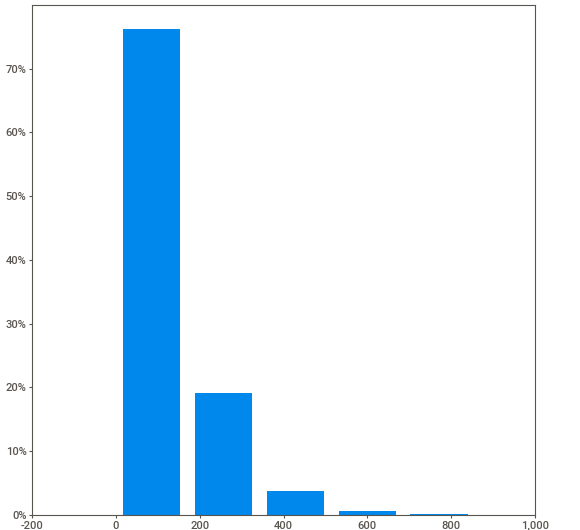
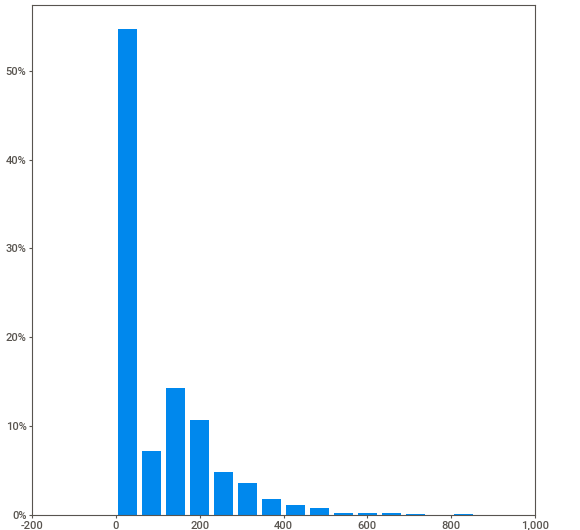
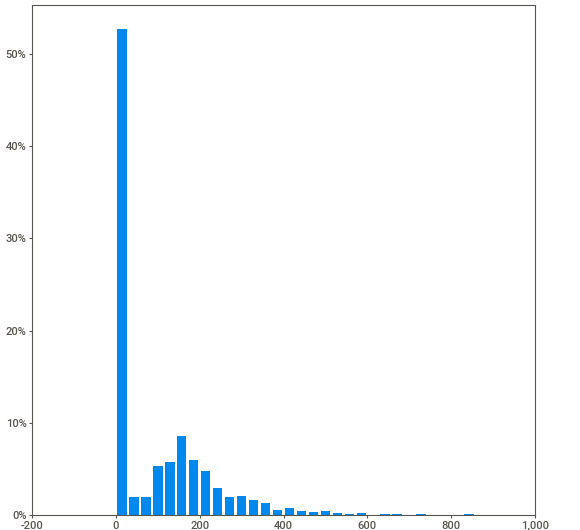
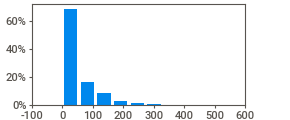
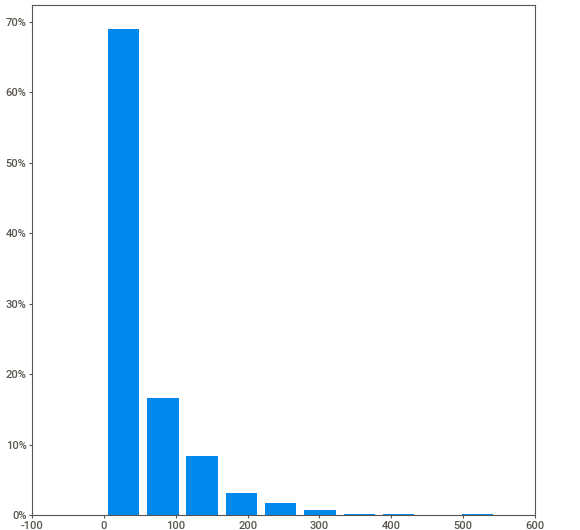
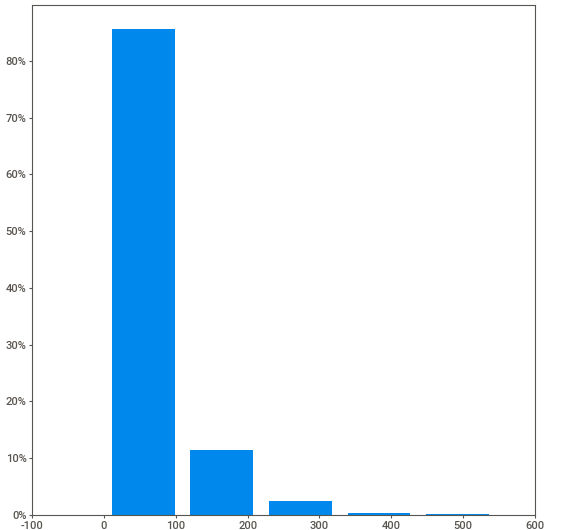
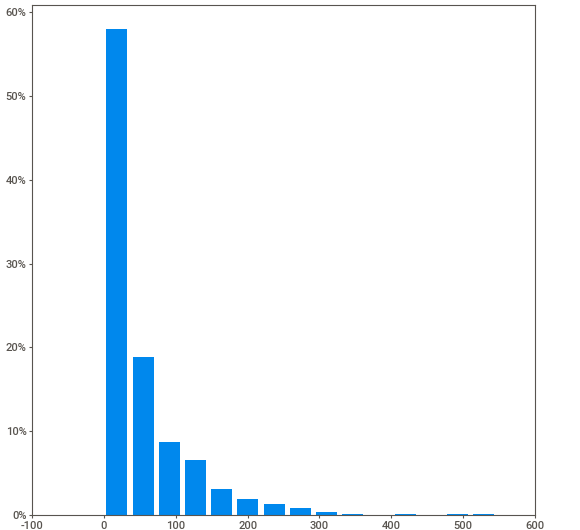
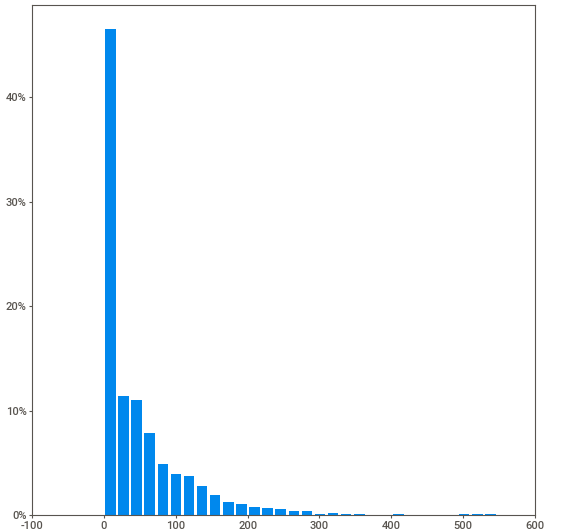
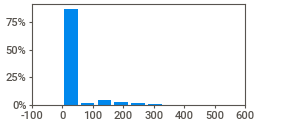
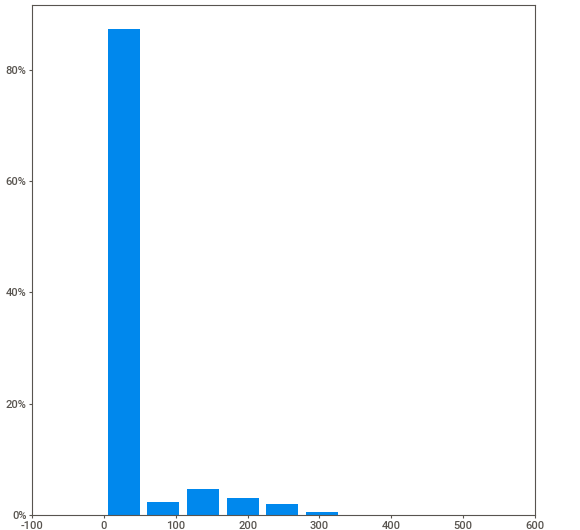
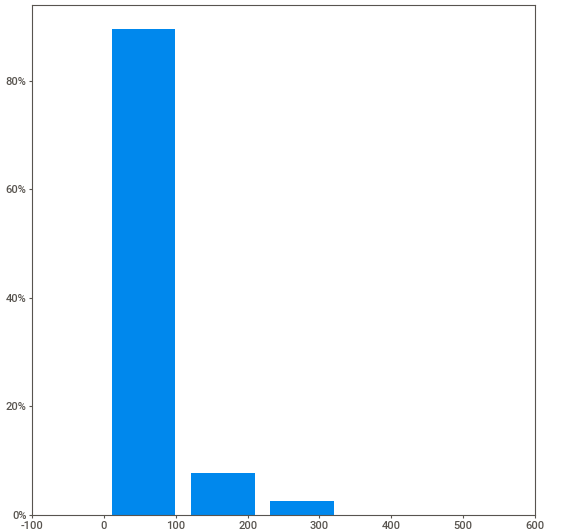
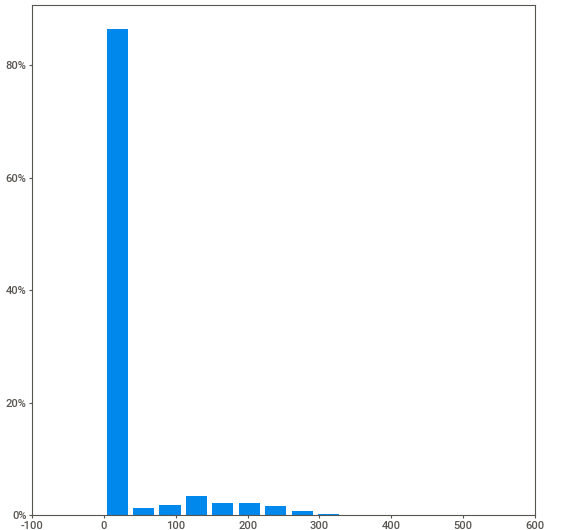
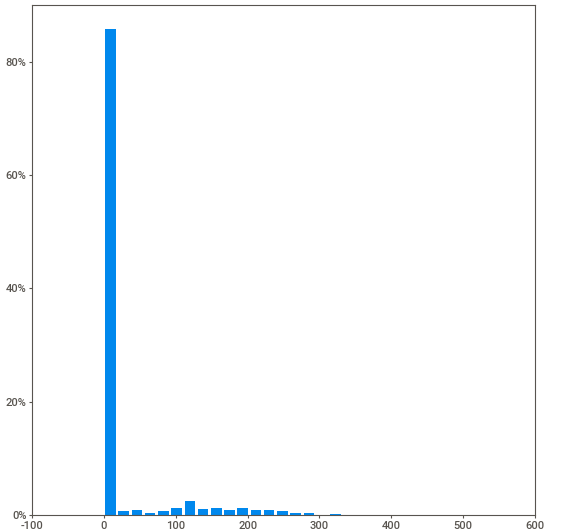
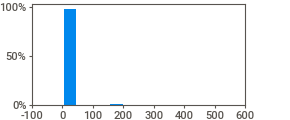
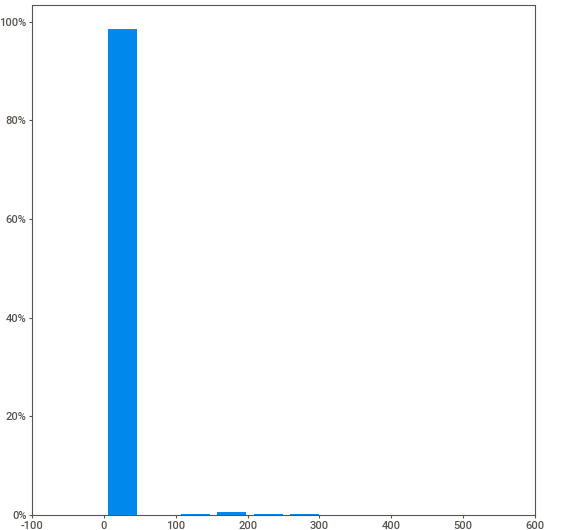
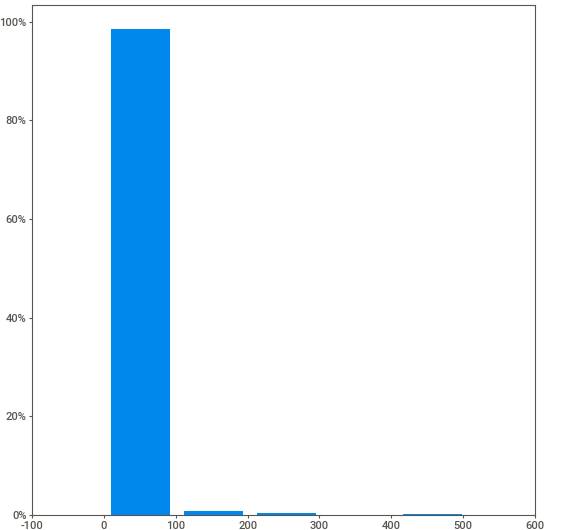
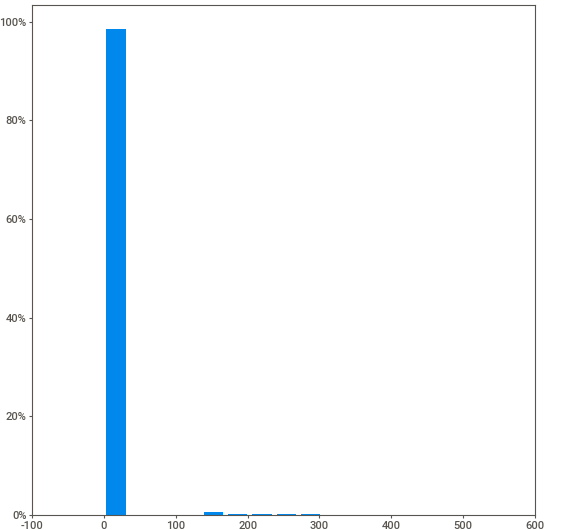
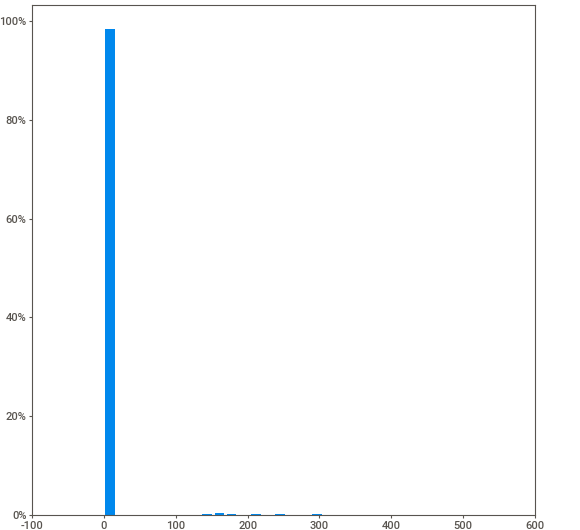
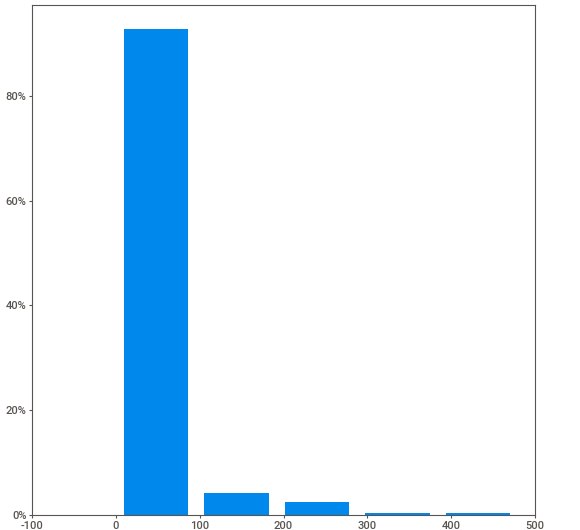
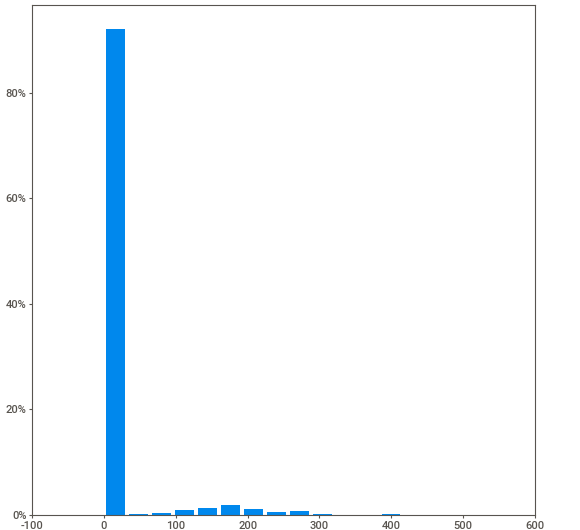
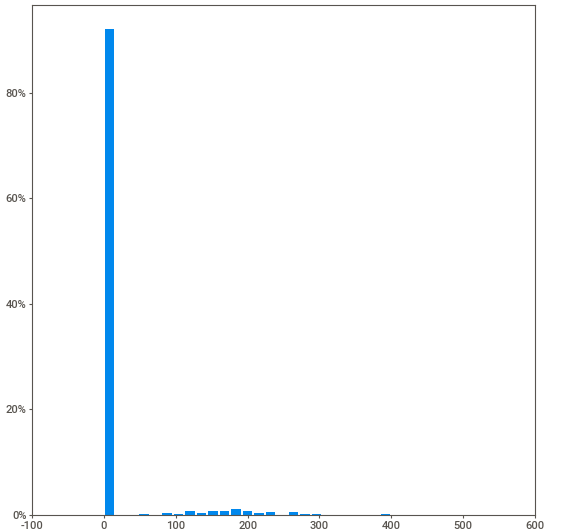
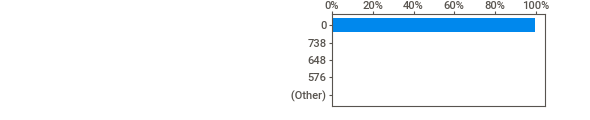
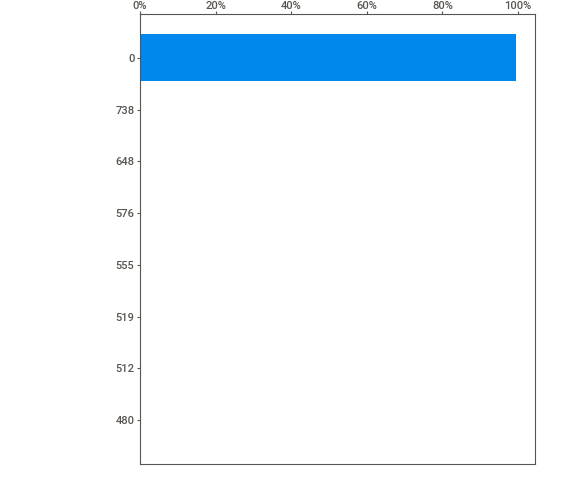
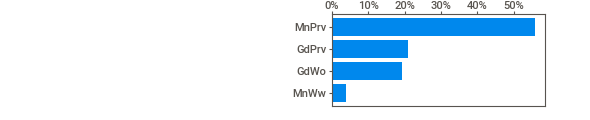
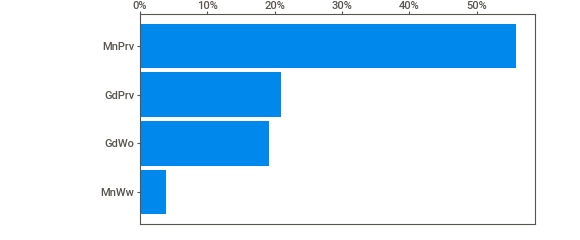
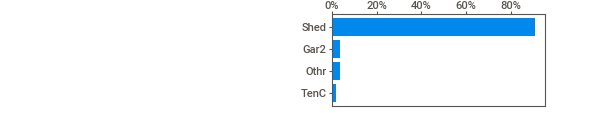
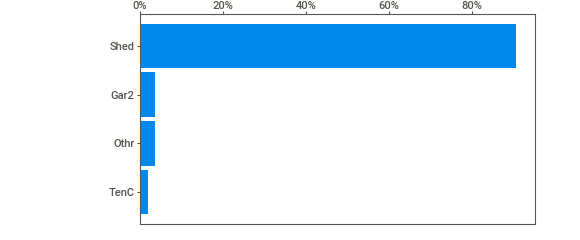
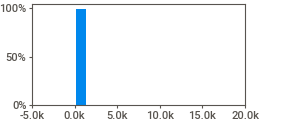
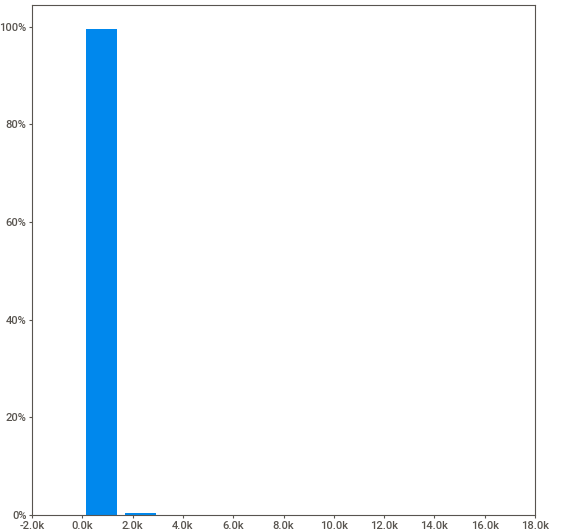
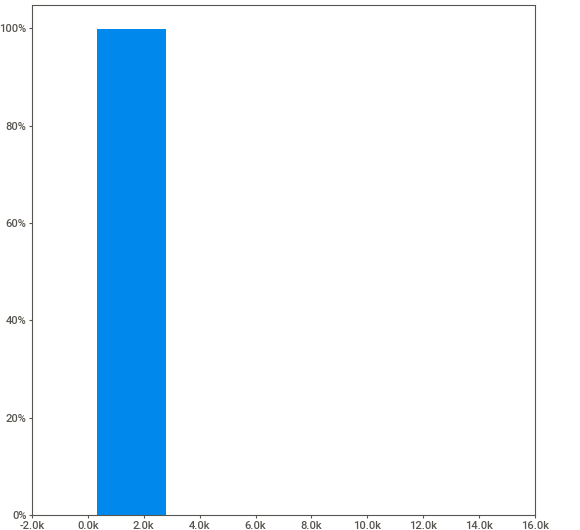
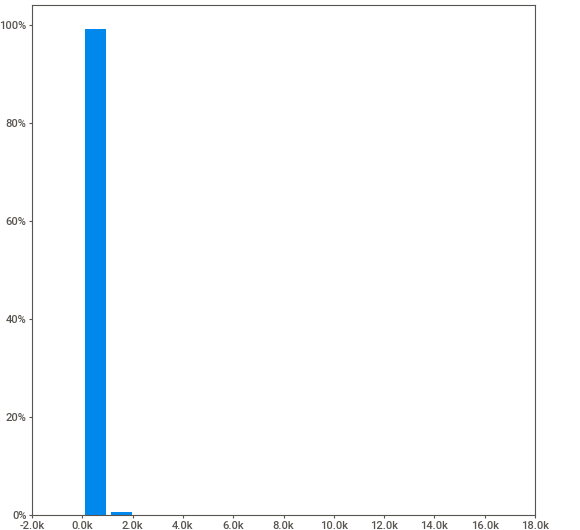
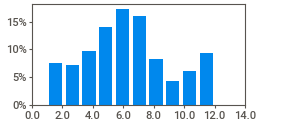
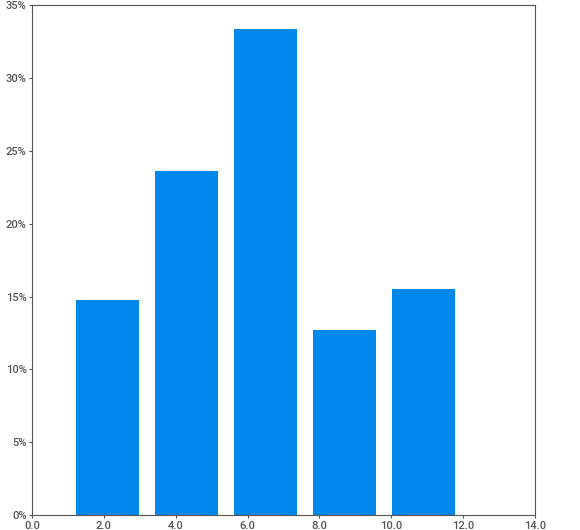
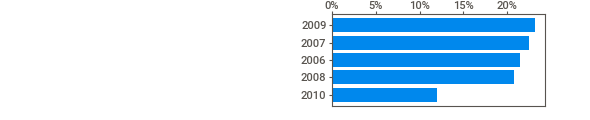
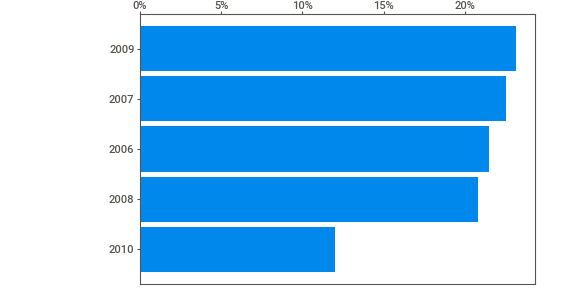
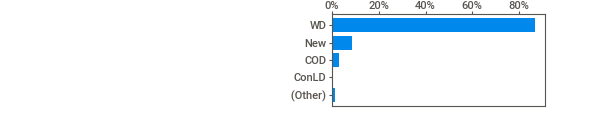
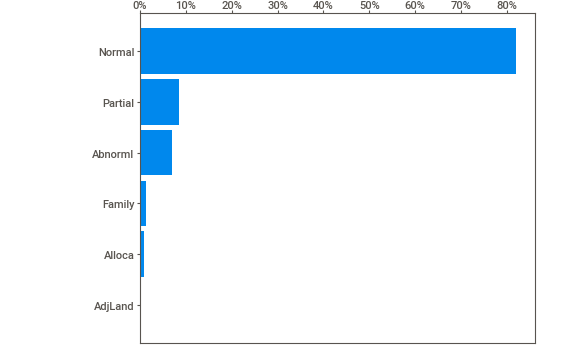
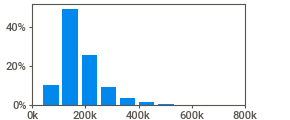
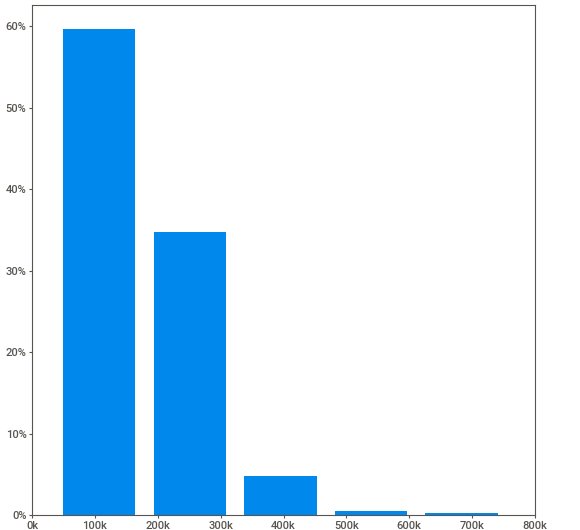
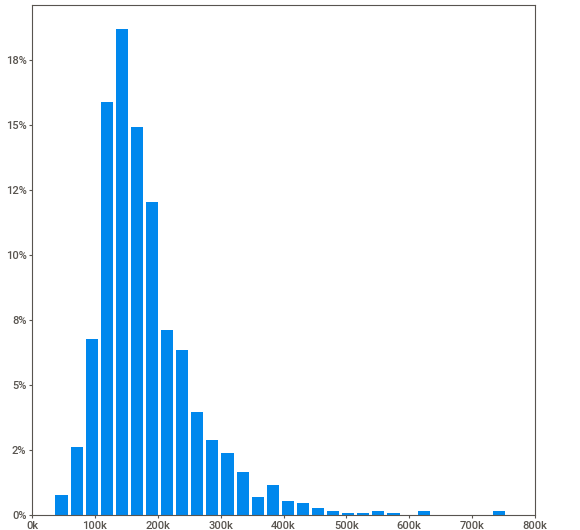
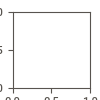

In [70]:

import sweetviz as sw

house_prices_report = sw.analyze(train_df)
house_prices_report.show_notebook(layout='vertical')

#Data exploration

## First overview of the correlation between features

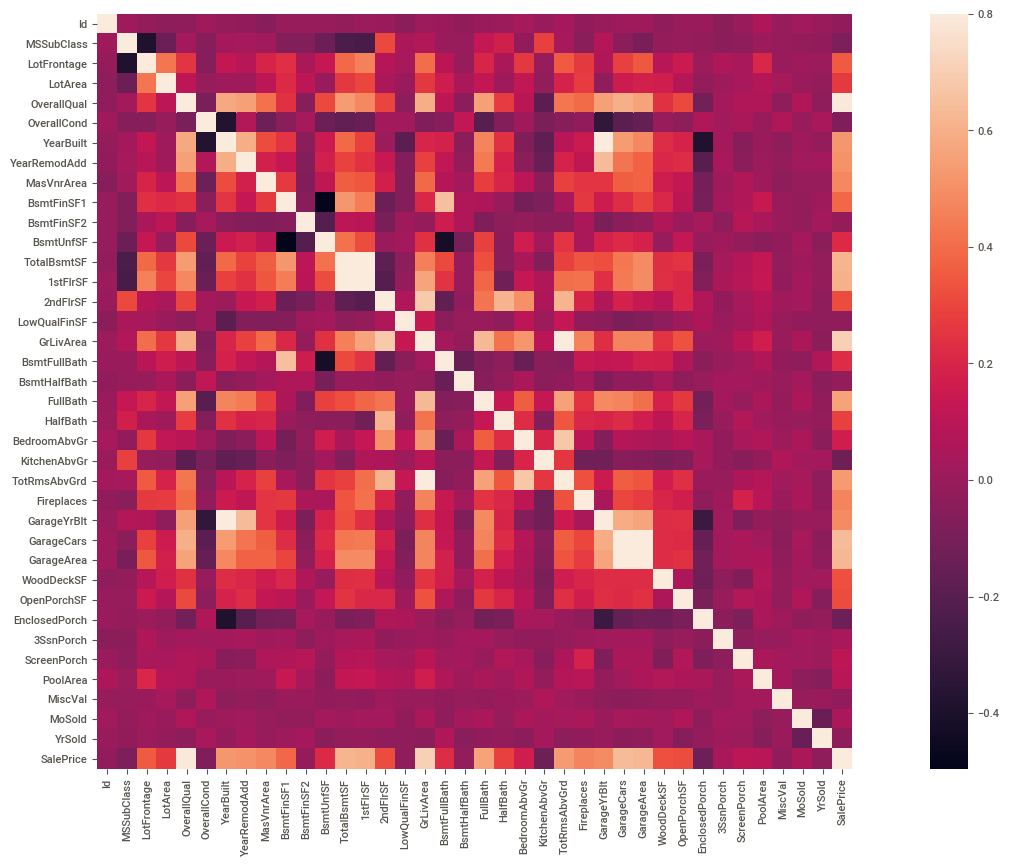

In [71]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, vmax=.8, square=True);

as you see its hard to understand the map , so we will reduce the heatmap to the top 10 correlation features with our target (SalePrice).

In [72]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(12, 9))
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

now we will check for outliers and then remove them.

In [73]:
var = 'OverallQual'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


We can see that there are no significant outliers between these features.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


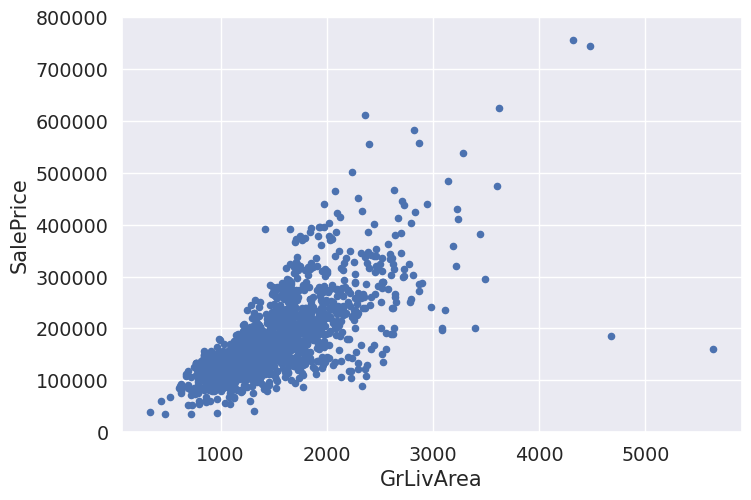

In [74]:
var = 'GrLivArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

We can see that there are two out liers with low price and big GrLivArea - lets drop them.

In [75]:
train_df.sort_values(by = 'GrLivArea', ascending = False)[:2]

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
1298  1299          60       RL  ...       New        Partial    160000
523    524          60       RL  ...       New        Partial    184750

[2 rows x 81 columns]

In [76]:

train_df = train_df.drop(train_df[train_df['Id'] == 1299].index)
train_df = train_df.drop(train_df[train_df['Id'] == 524].index)
train_df.reset_index(drop=True,inplace=True)

TotalBsmtSF: Total square feet of basement area

In [77]:

var = 'TotalBsmtSF'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


We can see that there are no significant outliers between these features.




GarageCars: Size of garage in car capacity

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


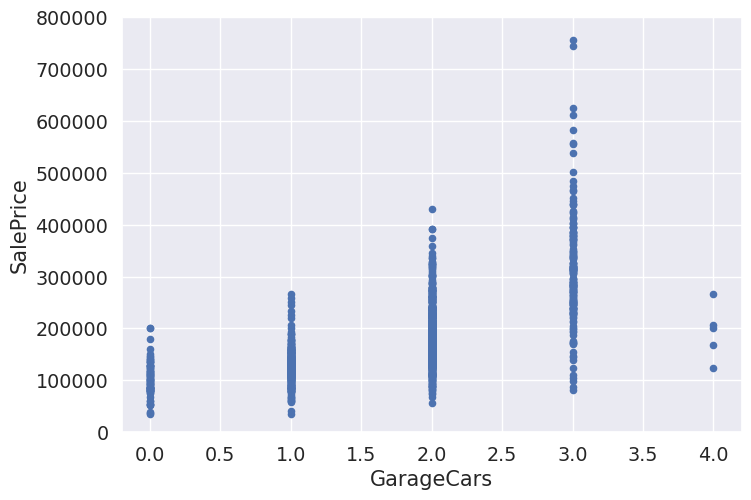

In [78]:
var = 'GarageCars'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

We can see that there are no significant outliers between these features.

# Removing Features

In the sweetWiz we can see 'Utilities' in all houses is 'Allpub' except for 1. 'Condition2' feature have 99% 'Norm' and 'RoofMatl' have 98% "CompShq', so we`ll drop that features.  

Heatmap show us that 'GarageArea' and 'GarageCars' are higly correlated. Same for '1stFlrSF' and 'TotalbsmtSF' and 'GarageYrBlt' and 'YearBlt'.
we decided to drop one feature of each pair (keep the one with the higher correlation with the target). 
Futrhermore 'GarageFinish' and 'GarageCond' are droped because they giving the similar info to 'GarageQual'


In [79]:
train_df = train_df.drop(columns=['GarageYrBlt','GarageArea','1stFlrSF','GarageFinish','GarageCond','Utilities','Condition2','RoofMatl'])
test_df = test_df.drop(columns=['GarageYrBlt','GarageArea','1stFlrSF','GarageFinish','GarageCond','Utilities','Condition2','RoofMatl'])

### Removing Id column and columns with too many missing data values.

In [80]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1452  0.995885
MiscFeature    1404  0.962963
Alley          1367  0.937586
Fence          1177  0.807270
FireplaceQu     690  0.473251
LotFrontage     259  0.177641
GarageType       81  0.055556
GarageQual       81  0.055556
BsmtExposure     38  0.026063
BsmtFinType2     38  0.026063
BsmtQual         37  0.025377
BsmtFinType1     37  0.025377
BsmtCond         37  0.025377
MasVnrArea        8  0.005487
MasVnrType        8  0.005487
Electrical        1  0.000686
Exterior2nd       0  0.000000
Exterior1st       0  0.000000
SalePrice         0  0.000000
ExterQual         0  0.000000

now we will drop all columns with more than 20% missing values

In [81]:
train_df = train_df.drop(columns=['Id','Alley','PoolQC','Fence','MiscFeature','FireplaceQu'])
test_df = test_df.drop(columns=['Id','Alley','PoolQC','Fence','MiscFeature','FireplaceQu'])

In [82]:
def get_cmap(n, name='plasma'):
    return plt.cm.get_cmap(name, n)

# plot target values by each feature
def plot_target_values_by_each_feature(df, target_column_name):
    nrows = math.ceil(math.sqrt(len(df.columns)-1))
    ncols = math.ceil((len(df.columns)-1)/nrows)
    plt.style.use('seaborn')
    fig, axes = plt.subplots(nrows, ncols)
    plt.subplots_adjust(top=3, bottom=0, left=0, right=2.5)
    colors = get_cmap(len(df.columns))

    counter = 0
    for i in range(len(df.columns)-1):
        df.plot(kind='scatter', x=df.columns[i], y=target_column_name, ax=axes[i//nrows, i%nrows], color=colors(i))
        axes[i//nrows, i%nrows].tick_params(axis='both', labelsize=10)
        axes[i//nrows, i%nrows].xaxis.label.set_size(10)
        axes[i//nrows, i%nrows].yaxis.label.set_size(10)
        axes[i//nrows, i%nrows].title.set_fontsize(10)

    for i in range(len(df.columns)-1, nrows*ncols):
        fig.delaxes(axes.flatten()[i])


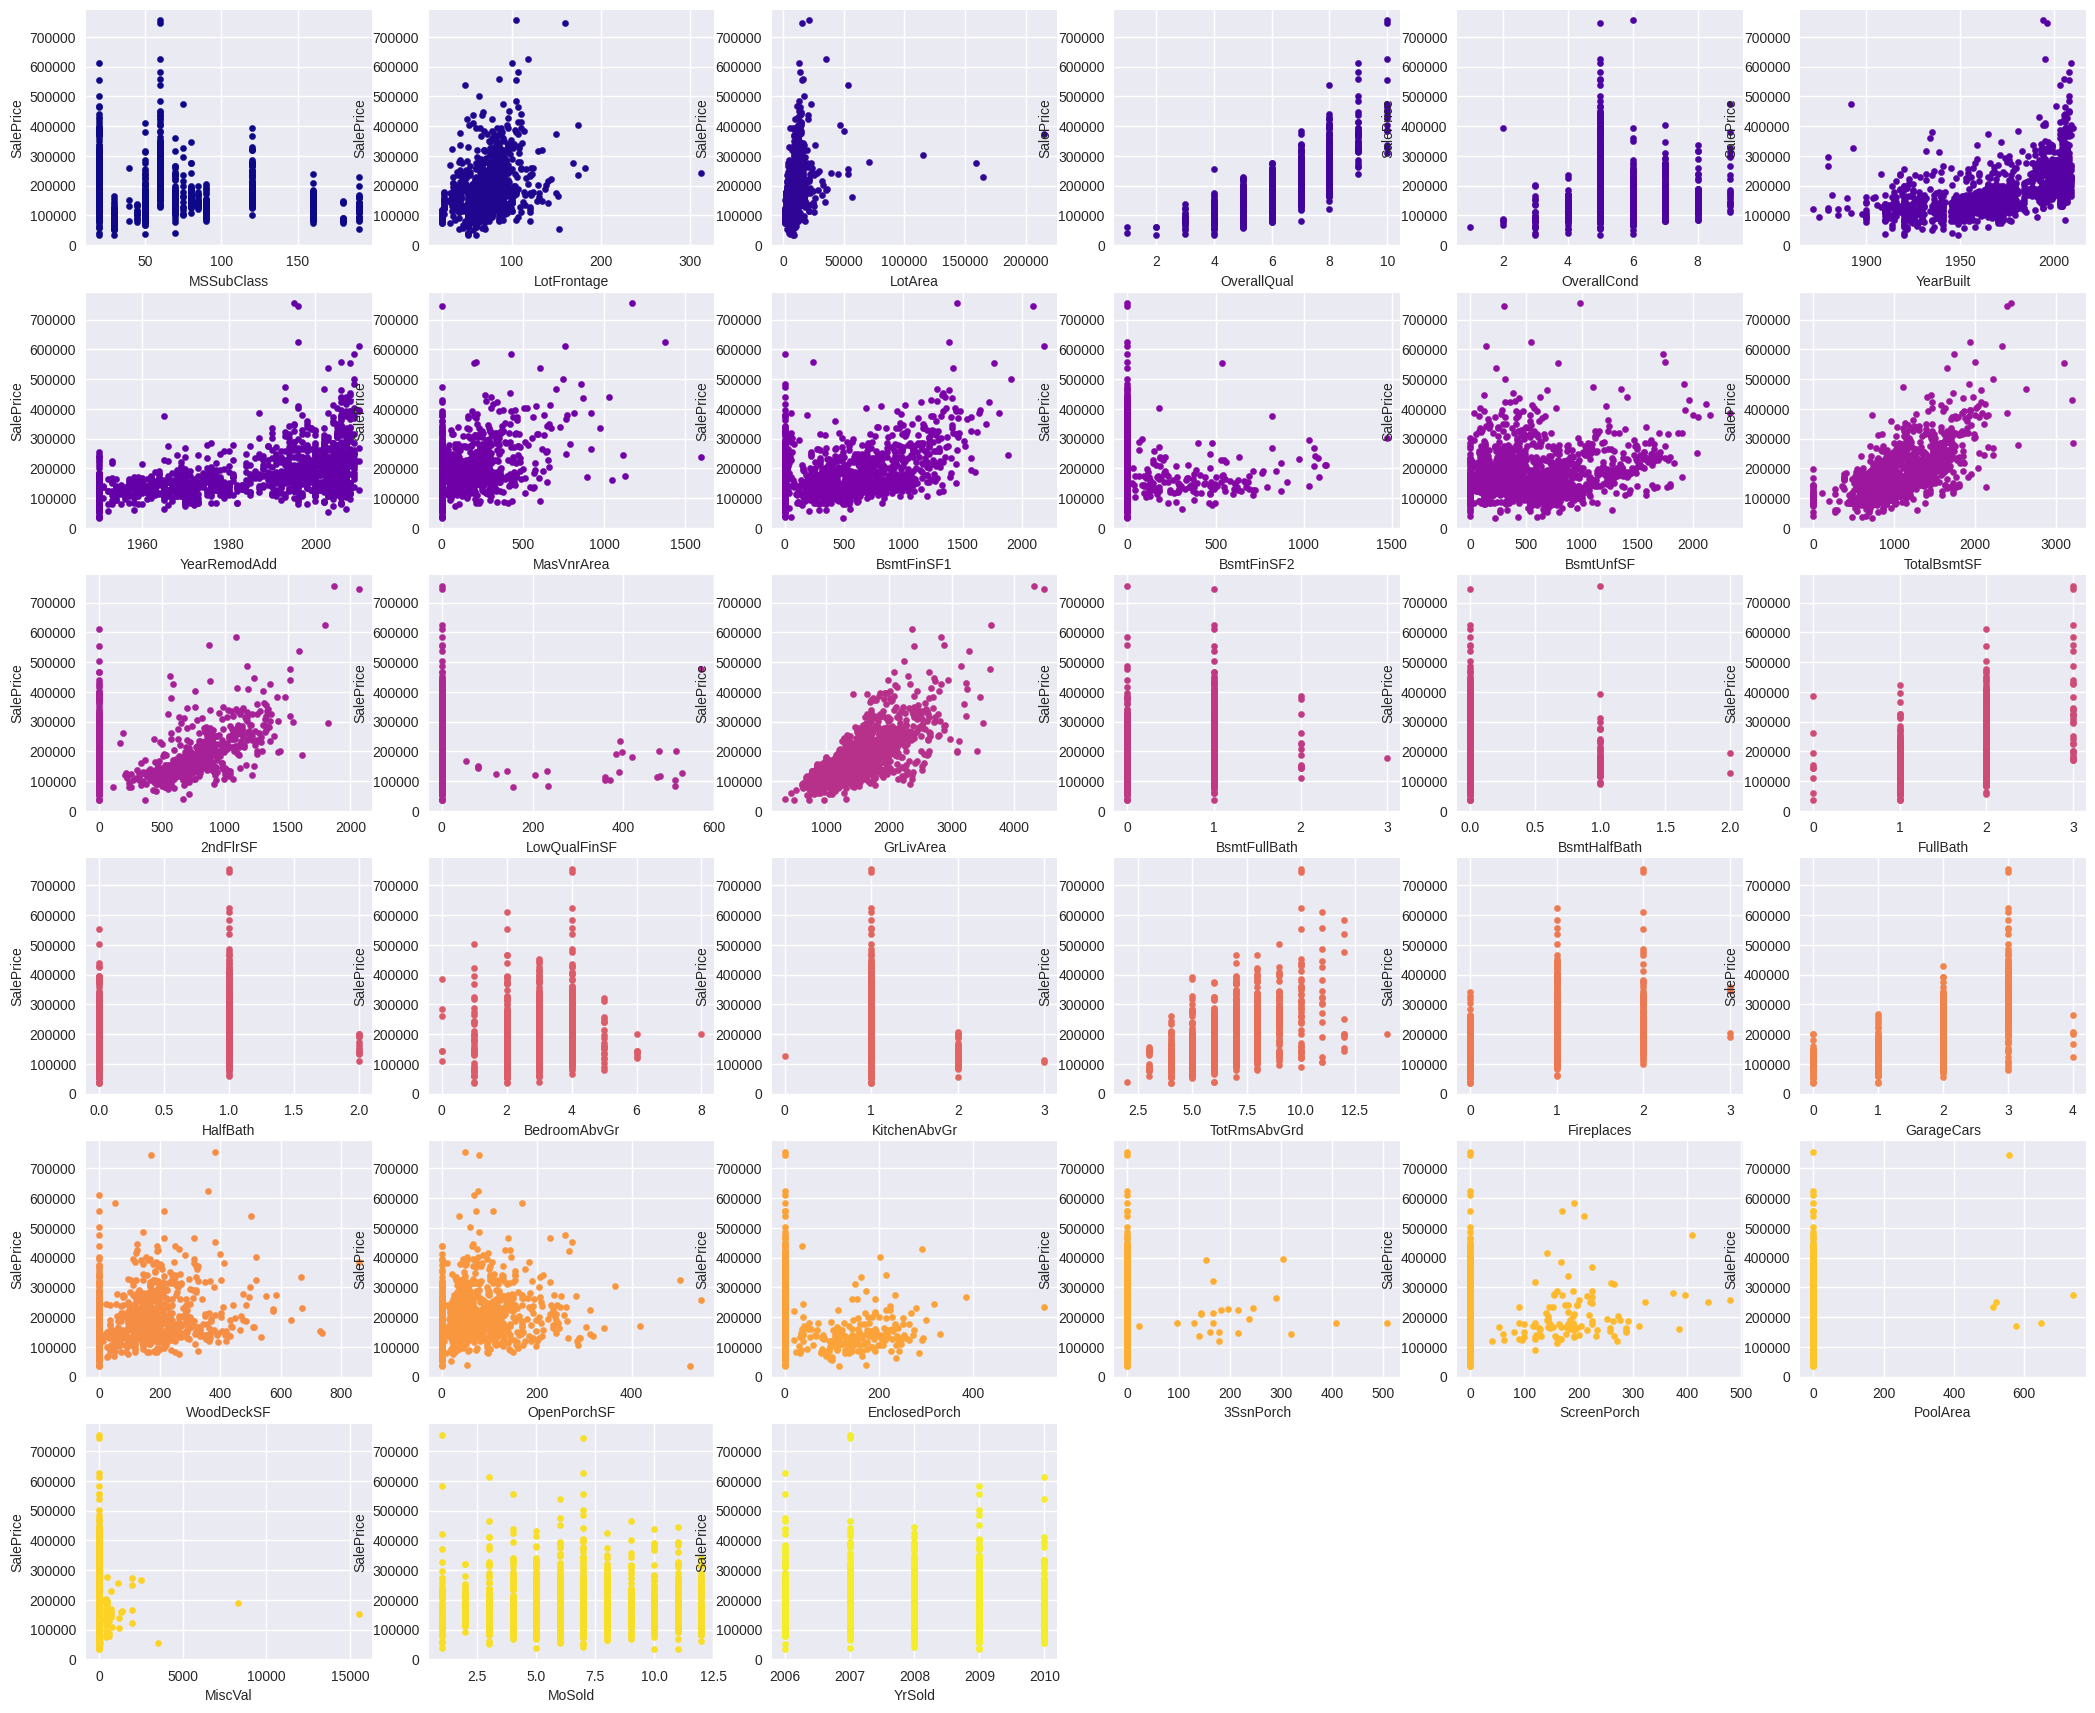

In [83]:
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
df_numerical = train_df[numerical_cols]
plot_target_values_by_each_feature(df_numerical, 'SalePrice')

## Conclusions 

### 'YearBuilt' and 'YearRemodAdd'
We will combine them because they seem to affect the target in similar way.



In [84]:
for df in [train_df, test_df]:
  df["YearLstCnst"] = df[["YearBuilt", "YearRemodAdd"]].max(axis=1)
train_df = train_df.drop(columns = ["YearBuilt", "YearRemodAdd"])
test_df = test_df.drop(columns = ["YearBuilt", "YearRemodAdd"])
display(train_df["YearLstCnst"])

0       2003
1       1976
2       2002
3       1970
4       2000
        ... 
1453    2000
1454    1988
1455    2006
1456    1996
1457    1965
Name: YearLstCnst, Length: 1458, dtype: int64

### 'EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'
None of them have good correlation with the price, i will drop them.

In [85]:
train_df = train_df.drop(columns=['EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'])
test_df = test_df.drop(columns=['EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'])

### KitchenAbvGr
It seem that the number of kitchens above ground dosent affect the price, in addition most of the houses have only one.
I will drop that column.

In [86]:
train_df = train_df.drop(columns=['KitchenAbvGr'])
test_df = test_df.drop(columns=['KitchenAbvGr'])

In [87]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
LotFrontage     259  0.177641
GarageQual       81  0.055556
GarageType       81  0.055556
BsmtFinType2     38  0.026063
BsmtExposure     38  0.026063
BsmtCond         37  0.025377
BsmtQual         37  0.025377
BsmtFinType1     37  0.025377
MasVnrArea        8  0.005487
MasVnrType        8  0.005487
Electrical        1  0.000686
Street            0  0.000000
RoofStyle         0  0.000000
Foundation        0  0.000000
ExterCond         0  0.000000
ExterQual         0  0.000000
Exterior2nd       0  0.000000
Exterior1st       0  0.000000
OverallCond       0  0.000000
LotShape          0  0.000000

# Filling missing values

LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

In [88]:
train_df["LotFrontage"] = train_df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

test_df["LotFrontage"] = test_df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))


BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 :  
For all these categorical basement-related features, NaN means that there is no basement

In [89]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_df[col] = train_df[col].fillna('None')

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    test_df[col] = test_df[col].fillna('None')

MasVnrArea and MasVnrType :   
NA most likely means no masonry veneer for these houses.   
We can fill 0 for the area and None for the type.

In [90]:
train_df["MasVnrType"] = train_df["MasVnrType"].fillna("None")
train_df["MasVnrArea"] = train_df["MasVnrArea"].fillna(0)
test_df["MasVnrType"] = test_df["MasVnrType"].fillna("None")
test_df["MasVnrArea"] = test_df["MasVnrArea"].fillna(0)

GarageType and GarageQual  : Replacing missing data with None

In [91]:
for col in ('GarageType', 'GarageQual'):
    train_df[col] = train_df[col].fillna('None')
    
for col in ('GarageType', 'GarageQual'):
    test_df[col] = test_df[col].fillna('None')

'Electrical' has only 1 missing value, so i fill it with the most frequent value.

In [92]:
train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])
test_df['Electrical'] = test_df['Electrical'].fillna(test_df['Electrical'].mode()[0])

Transforming some numerical variables that are really categorical

In [93]:
train_df['MSSubClass'] = train_df['MSSubClass'].apply(str)
test_df['MSSubClass'] = test_df['MSSubClass'].apply(str)

#Handeling with the test data
###Filling test missing values

In [94]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   object 
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   LotConfig      1459 non-null   object 
 8   LandSlope      1459 non-null   object 
 9   Neighborhood   1459 non-null   object 
 10  Condition1     1459 non-null   object 
 11  BldgType       1459 non-null   object 
 12  HouseStyle     1459 non-null   object 
 13  OverallQual    1459 non-null   int64  
 14  OverallCond    1459 non-null   int64  
 15  RoofStyle      1459 non-null   object 
 16  Exterior1st    1458 non-null   object 
 17  Exterior2nd    1458 non-null   object 
 18  MasVnrTy

In [95]:
total = test_df.isnull().sum().sort_values(ascending=False)
percent = (test_df.isnull().sum()/test_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
MSZoning          4  0.002742
BsmtHalfBath      2  0.001371
Functional        2  0.001371
BsmtFullBath      2  0.001371
Exterior1st       1  0.000685
Exterior2nd       1  0.000685
TotalBsmtSF       1  0.000685
KitchenQual       1  0.000685
BsmtUnfSF         1  0.000685
BsmtFinSF2        1  0.000685
GarageCars        1  0.000685
BsmtFinSF1        1  0.000685
SaleType          1  0.000685
OverallQual       0  0.000000
MasVnrType        0  0.000000
MasVnrArea        0  0.000000
ExterQual         0  0.000000
RoofStyle         0  0.000000
OverallCond       0  0.000000
YearLstCnst       0  0.000000

##MSZoning

In [96]:
test_df['MSZoning'].describe()

count     1455
unique       5
top         RL
freq      1114
Name: MSZoning, dtype: object

we can see that 77% of the values in that feature is RL, then i will fill the NA's with RL.

In [97]:
test_df['MSZoning'] = test_df['MSZoning'].fillna('RL')

# 'BsmtHalfBath', 'BsmtFullBath', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2' and 'BsmtFinSF1'

none in theese features means there is no basement

In [98]:
test_df[['BsmtHalfBath','BsmtFullBath','TotalBsmtSF','BsmtUnfSF','BsmtFinSF2','BsmtFinSF1']].describe()

BsmtHalfBath  BsmtFullBath  ...   BsmtFinSF2   BsmtFinSF1
count   1457.000000   1457.000000  ...  1458.000000  1458.000000
mean       0.065202      0.434454  ...    52.619342   439.203704
std        0.252468      0.530648  ...   176.753926   455.268042
min        0.000000      0.000000  ...     0.000000     0.000000
25%        0.000000      0.000000  ...     0.000000     0.000000
50%        0.000000      0.000000  ...     0.000000   350.500000
75%        0.000000      1.000000  ...     0.000000   753.500000
max        2.000000      3.000000  ...  1526.000000  4010.000000

[8 rows x 6 columns]

In [99]:
for col in ('BsmtHalfBath','BsmtFullBath','TotalBsmtSF','BsmtUnfSF','BsmtFinSF2','BsmtFinSF1'):
    test_df[col] = test_df[col].fillna(0)

#Functional

In [100]:
test_df['Functional'].describe()

count     1457
unique       7
top        Typ
freq      1357
Name: Functional, dtype: object

93% of the values is Typ

In [101]:
test_df['Functional'] = test_df['Functional'].fillna('Typ')

#SaleType

In [102]:
test_df['SaleType'].describe()

count     1458
unique       9
top         WD
freq      1258
Name: SaleType, dtype: object

In [103]:
test_df["SaleType"] = test_df["SaleType"].fillna("WD")

#GarageCars

In [104]:
test_df['GarageCars'].describe()

count    1458.000000
mean        1.766118
std         0.775945
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64

In [105]:
test_df["GarageCars"] = test_df["GarageCars"].fillna(test_df["GarageCars"].mean())

#Exterior1st and Exterior2nd

In [106]:
test_df[['Exterior1st', 'Exterior2nd']].describe()

Exterior1st Exterior2nd
count         1458        1458
unique          13          15
top        VinylSd     VinylSd
freq           510         510

In [107]:
test_df["Exterior1st"] = test_df["Exterior1st"].fillna("VinylSd")
test_df["Exterior2nd"] = test_df["Exterior2nd"].fillna("VinylSd")

# KitchenQual

In [108]:
test_df['KitchenQual'].describe()

count     1458
unique       4
top         TA
freq       757
Name: KitchenQual, dtype: object

In [109]:
test_df["KitchenQual"] = test_df["KitchenQual"].fillna("TA")

checking if all data is ready

In [110]:
test_df.isna().any()

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
LotShape         False
LandContour      False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
RoofStyle        False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvG

#Training 

In [111]:
from tqdm.auto import tqdm

def find_generator_len(generator, use_pbar=True):
    i = 0
    
    if use_pbar:
        pbar = tqdm(desc='Calculating Length', ncols=1000, bar_format='{desc}{bar:10}{r_bar}')

    for a in generator:
        i += 1

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    return i

First, lets split that data to features and target.

In [112]:
t = train_df['SalePrice'].copy()
X = train_df.drop(['SalePrice'], axis=1).copy()
print('t')
display(t)
print()
print('X')
display(X)

t


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1453    175000
1454    210000
1455    266500
1456    142125
1457    147500
Name: SalePrice, Length: 1458, dtype: int64


X


MSSubClass MSZoning  LotFrontage  ...  SaleType SaleCondition YearLstCnst
0            60       RL         65.0  ...        WD        Normal        2003
1            20       RL         80.0  ...        WD        Normal        1976
2            60       RL         68.0  ...        WD        Normal        2002
3            70       RL         60.0  ...        WD       Abnorml        1970
4            60       RL         84.0  ...        WD        Normal        2000
...         ...      ...          ...  ...       ...           ...         ...
1453         60       RL         62.0  ...        WD        Normal        2000
1454         20       RL         85.0  ...        WD        Normal        1988
1455         70       RL         66.0  ...        WD        Normal        2006
1456         20       RL         68.0  ...        WD        Normal        1996
1457         20       RL         75.0  ...        WD        Normal        1965

[1458 rows x 57 columns]

In [113]:
# calculate score and loss from cv (KFold) and display graphs
from sklearn.model_selection import KFold
def get_cv_score_and_loss(X, t, model, k, show_score_loss_graphs=False, use_pbar=True):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    cv = KFold(n_splits=k, shuffle=True, random_state=1)

    if use_pbar:
        pbar = tqdm(desc='Computing Models', total=find_generator_len(cv.split(X)))

    for i,(train_ids, val_ids) in enumerate(cv.split(X)):

        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]

        model.fit(X_train, t_train)

        y_train = model.predict(X_train)
        y_val = model.predict(X_val)
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train), mean_squared_error(t_train, y_train, squared=False)]
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val), mean_squared_error(t_val, y_val, squared=False)]

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()


    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()

    if show_score_loss_graphs:
        fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        fig.show()
        fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
        fig.show()

    return mean_val_score, mean_val_loss, mean_train_score, mean_train_loss

### 10-Fold CV.  
We will encode the categorical features with OHE and standard scalar on the numerical features. 
 

In [114]:
from sklearn.compose import ColumnTransformer
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, SGDRegressor(random_state=1))
# model = SGDRegressor(random_state=1)
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, model_pipe, k=10, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv train score: {train_score:.2f}\nmean cv train loss {train_loss:.2f}')

mean cv val score: 0.91
mean cv val loss 24125.05
mean cv train score: 0.93
mean cv train loss 21497.87


#Feature selection

We will use Scikit-learn RFECV that is based on the Backward Feature Selection.  
The default CV is 5-fold cross-validation.  
We will enter the Scikit-learn RepeatedKFold to repeat each KFold a few times with different splits.

In [115]:
# find best subset of features on this dataset

from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold
df = X.copy()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = categorical_cols.tolist() + numerical_cols.tolist()
ct = ColumnTransformer([
    ("encoding", OrdinalEncoder(), categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
X_encoded = pd.DataFrame(ct.fit_transform(X, t),columns=all_cols)
# model_pipe = make_pipeline(ct, SGDRegressor(random_state=1))
selector = RFECV(SGDRegressor(random_state=1), cv=RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)).fit(X_encoded, t)
display(X_encoded.loc[:, selector.support_])
best_features = selector.support_


fig = go.Figure()
fig.add_trace(go.Scatter(x=[i for i in range(1, len(selector.grid_scores_) + 1)], y=selector.grid_scores_))
fig.update_xaxes(title_text="Number of features selected")
fig.update_yaxes(title_text="Cross validation score (nb of correct classifications)")
fig.show()
print(X.loc[:, best_features].keys())
print("Number of features: {}".format(len(X.loc[:, best_features].keys())))

MSZoning  Street  LandContour  ...  GrLivArea  BedroomAbvGr  GarageCars
0          3.0     1.0          3.0  ...   0.393013      0.163894    0.313159
1          3.0     1.0          3.0  ...  -0.489391      0.163894    0.313159
2          3.0     1.0          3.0  ...   0.542706      0.163894    0.313159
3          3.0     1.0          3.0  ...   0.406800      0.163894    1.652119
4          3.0     1.0          3.0  ...   1.354202      1.389320    1.652119
...        ...     ...          ...  ...        ...           ...         ...
1453       3.0     1.0          3.0  ...   0.268925      0.163894    0.313159
1454       3.0     1.0          3.0  ...   1.107996      0.163894    0.313159
1455       3.0     1.0          3.0  ...   1.633893      1.389320   -1.025802
1456       3.0     1.0          3.0  ...  -0.851806     -1.061532   -1.025802
1457       3.0     1.0          3.0  ...  -0.501208      0.163894   -1.025802

[1458 rows x 25 columns]

Index(['MSZoning', 'LotFrontage', 'Street', 'LandContour', 'BldgType',
       'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'HeatingQC', 'Electrical', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'HalfBath', 'TotRmsAbvGrd', 'GarageQual', 'OpenPorchSF'],
      dtype='object')
Number of features: 25


In [116]:
X_best = X.loc[:,best_features]
X_best

MSZoning  LotFrontage Street  ... TotRmsAbvGrd GarageQual  OpenPorchSF
0          RL         65.0   Pave  ...            8         TA           61
1          RL         80.0   Pave  ...            6         TA            0
2          RL         68.0   Pave  ...            6         TA           42
3          RL         60.0   Pave  ...            7         TA           35
4          RL         84.0   Pave  ...            9         TA           84
...       ...          ...    ...  ...          ...        ...          ...
1453       RL         62.0   Pave  ...            7         TA           40
1454       RL         85.0   Pave  ...            7         TA            0
1455       RL         66.0   Pave  ...            9         TA           60
1456       RL         68.0   Pave  ...            5         TA            0
1457       RL         75.0   Pave  ...            6         TA           68

[1458 rows x 25 columns]

#Analysis
As we see feature selection selected 25 features as best score.
###next step:
Now, let's check diffrent polynomial degrees on this dataset and then choose the one with the best result.  


In [117]:
# show graph of score and loss by plynomial degree of numerical features
def show_degree_graphs_cv_train(X, t, model, k, max_degree=10):
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
    
    val_train_score_loss_df = pd.DataFrame(columns=['degree', 'split', 'score', 'loss'])
    for i in tqdm(range(1, max_degree), desc='Poly Degree'):
        ct_enc_std_poly = ColumnTransformer([
            ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
            ("standard_poly", make_pipeline(PolynomialFeatures(degree=i), StandardScaler()), numerical_cols)])
        model_pipe = make_pipeline(ct_enc_std_poly, model)
        # model_pipe = make_pipeline(PolynomialFeatures(degree=i),model)
        val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, model_pipe, k=k, show_score_loss_graphs=False, use_pbar=False)
        val_train_score_loss_df.loc[len(val_train_score_loss_df)] = [i, 'train', train_score, train_loss]
        val_train_score_loss_df.loc[len(val_train_score_loss_df)] = [i, 'cv', val_score, val_loss]

    fig = px.line(val_train_score_loss_df, x='degree', y='score', color='split')
    fig.show()
    fig = px.line(val_train_score_loss_df, x='degree', y='loss', color='split')
    fig.show()  
    
    max_val = val_train_score_loss_df["score"].max()
    best_degree = val_train_score_loss_df[val_train_score_loss_df["score"] == max_val]["degree"].to_numpy()[0]
    return best_degree

best_degree = show_degree_graphs_cv_train(X_best, t, SGDRegressor(random_state=1), k=10 ,max_degree=5)

#Analysis:
In both graphs above score and loss the best result is 2 .
The features that we selected chosen by the feature selection function.

Before, we tried to use all the 57 features that left after the data research, and it has lower score on the CV and on the final test.

## next step :
Let`s change some hyper-parameters of the SGD.



In [118]:
def choose_best_lr(x,t):
  scores = pd.DataFrame(columns=["lr", "val_score", "val_loss", "train_score", "train_loss"])
  lr=0.0001
  for i in range(1000):
    selector = SGDRegressor(random_state=1, eta0=lr, learning_rate="constant").fit(x, t)
    mean_val_score, mean_val_loss, mean_train_score, mean_train_loss = get_cv_score_and_loss(x, t, selector, k=10, show_score_loss_graphs=False, use_pbar=False)
    if mean_val_score < 0:
      break
    scores.loc[len(scores)] = [lr, mean_val_score, mean_val_loss, mean_train_score, mean_train_loss]
    lr += 0.0001

  fig = go.Figure()
  fig.add_trace(go.Scatter(x=scores["lr"], y=scores["val_score"]))
  fig.update_xaxes(title_text="Learning Rate")
  fig.update_yaxes(title_text="Cross validation score (no. of correct classifications)")
  fig.show()

  max_val = scores["val_score"].max()
  best_lr = scores[scores["val_score"] == max_val]["lr"].to_numpy()[0]
  return best_lr, max_val

X_ = X.loc[:,best_features]
numerical_cols = X_.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_.select_dtypes(include=['object', 'bool']).columns
all_cols = categorical_cols.tolist() + numerical_cols.tolist()
ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
X_encoded = pd.DataFrame(ct.fit_transform(X_, t))

best_lr,best_score = choose_best_lr(X_encoded,t)
print("Best learning rate : {}".format(best_lr))

Best learning rate : 0.0011000000000000003


## Regularization methods :
We will use diffrent regularization methods as we stuidied in class:
* l1 = lasso
* l2 = l1ridge 
* elasticnet = elasticNet

In [119]:
def choose_regularization(x,t):
  scores = pd.DataFrame(columns=["penalty", "val_score", "val_loss", "train_score", "train_loss"])
  for penalty in ['l1','l2','elasticnet']:
    selector = SGDRegressor(penalty=penalty ,random_state=1, eta0=best_lr, learning_rate="constant").fit(x, t)
    mean_val_score, mean_val_loss, mean_train_score, mean_train_loss = get_cv_score_and_loss(x, t, selector, k=10, show_score_loss_graphs=False, use_pbar=False)
    scores.loc[len(scores)] = [penalty, mean_val_score, mean_val_loss, mean_train_score, mean_train_loss]
    

  fig = go.Figure()
  fig.add_trace(go.Scatter(x=scores["penalty"], y=scores["val_score"]))
  fig.update_xaxes(title_text="penalty")
  fig.update_yaxes(title_text="Cross validation score (no. of correct classifications)")
  fig.show()

  max_val = scores["val_score"].max()
  best_penalty = scores[scores["val_score"] == max_val]["penalty"]
  return best_penalty, max_val
  
X_ = X.loc[:,best_features]
numerical_cols = X_.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_.select_dtypes(include=['object', 'bool']).columns
all_cols = categorical_cols.tolist() + numerical_cols.tolist()
ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
X_encoded = pd.DataFrame(ct.fit_transform(X_, t))

best_penalty,best_score = choose_regularization(X_encoded,t)
print("Best penalty : {}".format(best_penalty))

Best penalty : 1    l2
Name: penalty, dtype: object


We can see that l2 = ridge give us the best cv score.

In [120]:
best_penalty = 'l2'

## Alpha parameter
Now we will do the same for the regularization parameter of the SGD.

In [57]:
def choose_best_alpha(x,t):
  scores = pd.DataFrame(columns=["alpha", "val_score", "val_loss", "train_score", "train_loss"])
  alpha=0.0001
  
  for i in tqdm(range(100), desc='Alpha'):
    selector = SGDRegressor(penalty = best_penalty, alpha=alpha, random_state=1, eta0=best_lr, learning_rate="constant").fit(x, t)
    mean_val_score, mean_val_loss, mean_train_score, mean_train_loss = get_cv_score_and_loss(x, t, selector, k=10, show_score_loss_graphs=False, use_pbar=False)
    if mean_val_score < 0:
      break
    scores.loc[len(scores)] = [alpha, mean_val_score, mean_val_loss, mean_train_score, mean_train_loss]
    alpha += 0.0001

  fig = go.Figure()
  fig.add_trace(go.Scatter(x=scores["alpha"], y=scores["val_score"]))
  fig.update_xaxes(title_text="alpha")
  fig.update_yaxes(title_text="Cross validation score (no. of correct classifications)")
  fig.show()

  max_val = scores["val_score"].max()
  best_alpha = scores[scores["val_score"] == max_val]["alpha"].to_numpy()[0]
  return best_alpha, max_val

X_ = X.loc[:,best_features]
numerical_cols = X_.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_.select_dtypes(include=['object', 'bool']).columns
all_cols = categorical_cols.tolist() + numerical_cols.tolist()
ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
X_encoded = pd.DataFrame(ct.fit_transform(X_, t))

best_alpha,best_score = choose_best_alpha(X_encoded,t)
print("Best learning rate : {}".format(best_alpha))

Best learning rate : 0.0010000000000000002


#Final model and submission

Now we will use the result of our research to build a model.

In [58]:
print("Number of features = {}, Degree = {}, Penalty = {}, Learning rate = {}, alpha = {}".format(len(X.loc[:, best_features].keys()),best_degree,best_penalty,best_lr, best_alpha))

Number of features = 25, Degree = 2, Penalty = l2, Learning rate = 0.0011000000000000003, alpha = 0.0010000000000000002


In [59]:
features = X.loc[:,best_features].keys()
X_train = X[features]
display(X_train)

MSZoning  LotFrontage Street  ... TotRmsAbvGrd GarageQual  OpenPorchSF
0          RL         65.0   Pave  ...            8         TA           61
1          RL         80.0   Pave  ...            6         TA            0
2          RL         68.0   Pave  ...            6         TA           42
3          RL         60.0   Pave  ...            7         TA           35
4          RL         84.0   Pave  ...            9         TA           84
...       ...          ...    ...  ...          ...        ...          ...
1453       RL         62.0   Pave  ...            7         TA           40
1454       RL         85.0   Pave  ...            7         TA            0
1455       RL         66.0   Pave  ...            9         TA           60
1456       RL         68.0   Pave  ...            5         TA            0
1457       RL         75.0   Pave  ...            6         TA           68

[1458 rows x 25 columns]

In [143]:
ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
    ("standard", make_pipeline(PolynomialFeatures(degree=2), StandardScaler()), numerical_cols)])
model_pipe = make_pipeline(ct, SGDRegressor(penalty='elasticnet', random_state=1, alpha=best_alpha, eta0=best_lr, learning_rate="constant"))
model_pipe.fit(X_train,t)



Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('encoding',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['MSZoning', 'Street', 'LandContour', 'BldgType', 'RoofStyle',
       'Exterior...
                 SGDRegressor(alpha=0.0010000000000000002, average=False,
                              early_stopping=False, epsilon=

In [144]:
y_train = model_pipe.predict(X_train)

rmse = mean_squared_error(t, y_train, squared=False)
print("Final RMSE: {}".format(rmse))

Final RMSE: 25936.086806308813


In [145]:
X_test = test_df[features]
X_test

MSZoning  LotFrontage Street  ... TotRmsAbvGrd GarageQual  OpenPorchSF
0          RH         80.0   Pave  ...            5         TA            0
1          RL         81.0   Pave  ...            6         TA           36
2          RL         74.0   Pave  ...            6         TA           34
3          RL         78.0   Pave  ...            7         TA           36
4          RL         43.0   Pave  ...            5         TA           82
...       ...          ...    ...  ...          ...        ...          ...
1454       RM         21.0   Pave  ...            5       None            0
1455       RM         21.0   Pave  ...            6         TA           24
1456       RL        160.0   Pave  ...            7         TA            0
1457       RL         62.0   Pave  ...            6       None           32
1458       RL         74.0   Pave  ...            9         TA           48

[1459 rows x 25 columns]

In [146]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1459 non-null   object 
 1   LotFrontage   1459 non-null   float64
 2   Street        1459 non-null   object 
 3   LandContour   1459 non-null   object 
 4   BldgType      1459 non-null   object 
 5   OverallCond   1459 non-null   int64  
 6   RoofStyle     1459 non-null   object 
 7   Exterior1st   1459 non-null   object 
 8   Exterior2nd   1459 non-null   object 
 9   MasVnrType    1459 non-null   object 
 10  ExterCond     1459 non-null   object 
 11  BsmtQual      1459 non-null   object 
 12  BsmtExposure  1459 non-null   object 
 13  BsmtFinSF1    1459 non-null   float64
 14  BsmtFinType2  1459 non-null   object 
 15  BsmtUnfSF     1459 non-null   float64
 16  HeatingQC     1459 non-null   object 
 17  Electrical    1459 non-null   object 
 18  2ndFlrSF      1459 non-null 

##Prediction

In [148]:
y_test =  model_pipe.predict(X_test)

submission = pd.DataFrame({
        "Id": test_id,
        "SalePrice": y_test
    })
submission.to_csv('submission5.csv', index=False)

##Submissions

https://i.ibb.co/HYJ93Lh/image.png
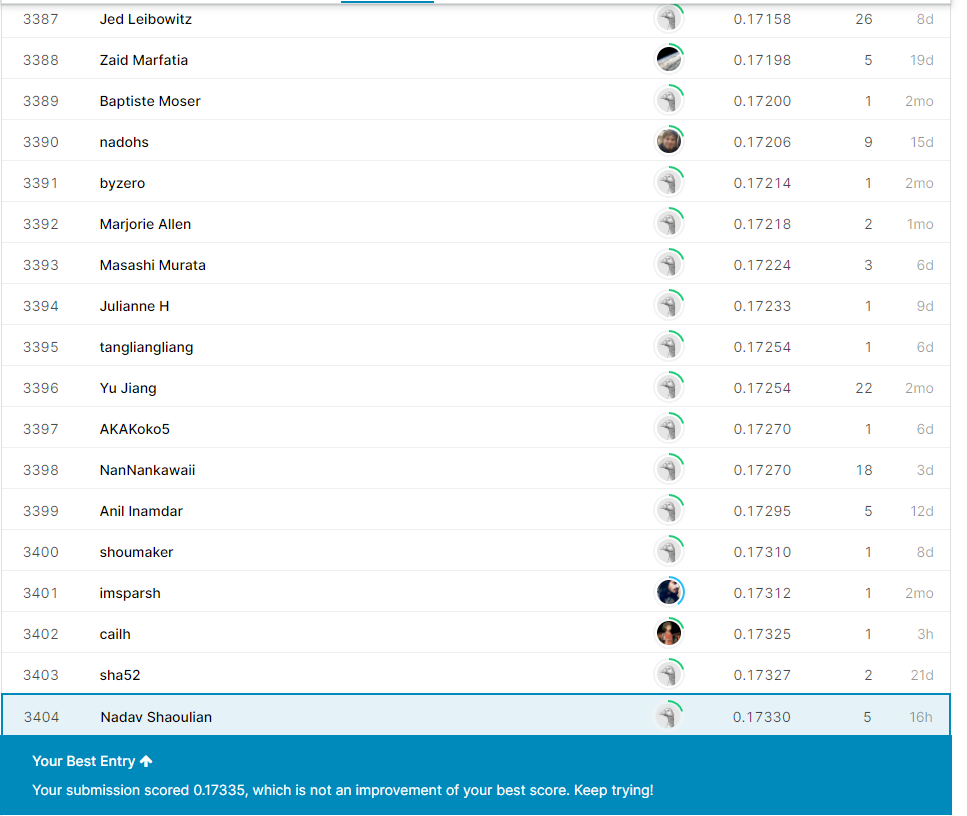

#Conclusion
In this assginment were asked to predict the house prices in Ames, Lowa.    
Our data is assembled from 80 features some of them were related and some didn`t ,  data exloring and research was important and because of the size of the features there was a lot of work ,finding out which of the features have the biggest potential to predict the targets value.    

To achive that goal we used correlation methods and graphs that showed us some information about the relationship between the features and the target .

In addition, we used CV and K-Fold to find out the best degree, regularization method and some hyper-parameters such as alpha and learning rate,these all helped to learn the model in the best way.  

insights:   
* choosing the best degree for the model has a major impact of the CV predict.
* OHE on categorical features turn out to be mistake because its returned a lot of features .
* Training is very important to our result  




# Credits :
###Notebooks :
Class exercises (5 and 6).

https://www.kaggle.com/mahmoudalaa01010101/regularized-linear-models#missing-data
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python  
https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard